# PROJEKT V2

- Tymoteuesz Hanusiak

NOTE : SGD - Stochastic Gradent Descent  

## Cel projektu

Celem projektu jest zbadanie struktury wielowymiarowej danych opisujących kraje świata oraz ocena, 
czy kraje z tych samych regionów geograficznych tworzą zbliżone skupiska w przestrzeni cech społeczno-ekonomicznych. 
Projekt ma na celu sprawdzenie,  ktore algorytmy pozwola najlepiej  uchwycić naturalny 
podział krajów na grupy zgodne z ich położeniem geograficznym.


In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [162]:

data=pd.read_csv('WORLD.csv')



data.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [163]:
data.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

## opis danych 

- **pomijamy oczywiste nazwy kolumn takie jak Country Population etc**

**Coastline (coast/area ratio)** – stosunek długości linii brzegowej do powierzchni kraju.

**Net migration** – saldo migracji na 1000 osób (dodatnie = więcej imigrantów, ujemne = więcej emigrantów).

**Infant mortality (per 1000 births)** – zgony niemowląt na 1000 żywych urodzeń.

**Phones (per 1000)** – liczba telefonów (stacjonarnych i komórkowych) na 1000 mieszkańców.

**Arable (%)** – procent powierzchni nadającej się pod uprawy rolnicze.

**Crops (%)** – procent powierzchni zajętej przez uprawy wieloletnie.

**Other (%)** – pozostała powierzchnia (lasy, góry, pustynie). Arable + Crops + Other ≈ 100%.

**Climate** – numeryczny kod typu klimatu (1–4).

**Birthrate / Deathrate** – liczba urodzeń / zgonów na 1000 mieszkańców rocznie.

**Agriculture / Industry / Service** – udział sektorów gospodarki w PKB; suma ≈ 1.0.

## Region :

## Opis kategorii zmiennej "Region"

**SUB-SAHARAN AFRICA** – kraje Afryki położone na południe od Sahary (np. Angola, Kenia, Nigeria).

**LATIN AMER. & CARIB** – kraje Ameryki Łacińskiej i Karaibów (np. Argentyna, Brazylia, Jamajka).

**ASIA (EX. NEAR EAST)** – kraje Azji z wyłączeniem Bliskiego Wschodu (np. Chiny, Indie, Pakistan).

**WESTERN EUROPE** – kraje Europy Zachodniej (np. Francja, Niemcy, Belgia).

**OCEANIA** – kraje i terytoria Oceanii (np. Australia, Nowa Zelandia, Polinezja).

**NEAR EAST** – kraje Bliskiego Wschodu (np. Arabia Saudyjska, Izrael, Jordania).

**C.W. OF IND. STATES** – państwa Wspólnoty Niepodległych Państw (post-sowieckie)  
np. Armenia, Białoruś, Kazachstan, Uzbekistan.

**EASTERN EUROPE** – Europa Wschodnia (np. Polska, Czechy, Rumunia, Albania).

**NORTHERN AFRICA** – Afryka Północna (np. Egipt, Algieria, Libia, Maroko).

**NORTHERN AMERICA** – Ameryka Północna (USA, Kanada).

**BALTICS** – kraje bałtyckie (Litwa, Łotwa, Estonia).






In [164]:
data['Region'].value_counts()

Region
SUB-SAHARAN AFRICA                     51
LATIN AMER. & CARIB                    45
ASIA (EX. NEAR EAST)                   28
WESTERN EUROPE                         28
OCEANIA                                21
NEAR EAST                              16
EASTERN EUROPE                         12
C.W. OF IND. STATES                    12
NORTHERN AFRICA                         6
NORTHERN AMERICA                        5
BALTICS                                 3
Name: count, dtype: int64

## preporcess

In [165]:
data.shape


(227, 20)

In [166]:
data = data.dropna()


data

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Venezuela,LATIN AMER. & CARIB,25730435,912050,"28,2","0,31","-0,04","22,2",4800.0,"93,4","140,1","2,95","0,92","96,13",2,"18,71","4,92","0,04","0,419","0,541"
219,Vietnam,ASIA (EX. NEAR EAST),84402966,329560,"256,1","1,05","-0,45","25,95",2500.0,"90,3","187,7","19,97","5,95","74,08",2,"16,86","6,22","0,209","0,41","0,381"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [167]:
data

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Venezuela,LATIN AMER. & CARIB,25730435,912050,"28,2","0,31","-0,04","22,2",4800.0,"93,4","140,1","2,95","0,92","96,13",2,"18,71","4,92","0,04","0,419","0,541"
219,Vietnam,ASIA (EX. NEAR EAST),84402966,329560,"256,1","1,05","-0,45","25,95",2500.0,"90,3","187,7","19,97","5,95","74,08",2,"16,86","6,22","0,209","0,41","0,381"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [168]:
data.isna().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [169]:
data.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object

In [170]:
data

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Venezuela,LATIN AMER. & CARIB,25730435,912050,"28,2","0,31","-0,04","22,2",4800.0,"93,4","140,1","2,95","0,92","96,13",2,"18,71","4,92","0,04","0,419","0,541"
219,Vietnam,ASIA (EX. NEAR EAST),84402966,329560,"256,1","1,05","-0,45","25,95",2500.0,"90,3","187,7","19,97","5,95","74,08",2,"16,86","6,22","0,209","0,41","0,381"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [171]:
data = data.rename(columns={
    "Country": "country",
    "Region": "region",
    "Population": "population",
    "Area (sq. mi.)": "area_sq_mi",
    "Pop. Density (per sq. mi.)": "pop_density_per_sq_mi",
    "Coastline (coast/area ratio)": "coastline_ratio",
    "Net migration": "net_migration_per_1000",
    "Infant mortality (per 1000 births)": "infant_mort_per_1000",
    "GDP ($ per capita)": "gdp_per_capita_usd",
    "Literacy (%)": "literacy_pct",
    "Phones (per 1000)": "phones_per_1000",
    "Arable (%)": "arable_pct",
    "Crops (%)": "crops_pct",
    "Other (%)": "other_pct",
    "Climate": "climate_code",
    "Birthrate": "birthrate_per_1000",
    "Deathrate": "deathrate_per_1000",
    "Agriculture": "agriculture_pct_gdp",
    "Industry": "industry_pct_gdp",
    "Service": "service_pct_gdp"
})


In [172]:
data.columns

Index(['country', 'region', 'population', 'area_sq_mi',
       'pop_density_per_sq_mi', 'coastline_ratio', 'net_migration_per_1000',
       'infant_mort_per_1000', 'gdp_per_capita_usd', 'literacy_pct',
       'phones_per_1000', 'arable_pct', 'crops_pct', 'other_pct',
       'climate_code', 'birthrate_per_1000', 'deathrate_per_1000',
       'agriculture_pct_gdp', 'industry_pct_gdp', 'service_pct_gdp'],
      dtype='object')

In [173]:
data = data.replace(',', '.', regex=True)

for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='ignore')

# 3. Sprawdzenie wyników
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 179 non-null    object 
 1   region                  179 non-null    object 
 2   population              179 non-null    int64  
 3   area_sq_mi              179 non-null    int64  
 4   pop_density_per_sq_mi   179 non-null    float64
 5   coastline_ratio         179 non-null    float64
 6   net_migration_per_1000  179 non-null    float64
 7   infant_mort_per_1000    179 non-null    float64
 8   gdp_per_capita_usd      179 non-null    float64
 9   literacy_pct            179 non-null    float64
 10  phones_per_1000         179 non-null    float64
 11  arable_pct              179 non-null    float64
 12  crops_pct               179 non-null    float64
 13  other_pct               179 non-null    float64
 14  climate_code            179 non-null    float64

In [174]:
data['country']=data['country'].str.strip()

In [175]:
data['region'] =data['region'].str.strip()

In [176]:
data.loc[data['region']=='C.W. OF IND. STATES',:]

,country,region,population,area_sq_mi,pop_density_per_sq_mi,coastline_ratio,net_migration_per_1000,infant_mort_per_1000,gdp_per_capita_usd,literacy_pct,phones_per_1000,arable_pct,crops_pct,other_pct,climate_code,birthrate_per_1000,deathrate_per_1000,agriculture_pct_gdp,industry_pct_gdp,service_pct_gdp
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418
13,Azerbaijan,C.W. OF IND. STATES,7961619,86600,91.9,0.00,-4.90,81.74,3400.0,97.0,137.1,19.63,2.71,77.66,1.0,20.74,9.75,0.141,0.457,0.402
18,Belarus,C.W. OF IND. STATES,10293011,207600,49.6,0.00,2.54,13.37,6100.0,99.6,319.1,29.55,0.60,69.85,4.0,11.16,14.02,0.093,0.316,0.591
75,Georgia,C.W. OF IND. STATES,4661473,69700,66.9,0.44,-4.70,18.59,2500.0,99.0,146.6,11.44,3.86,84.70,3.0,10.41,9.23,0.172,0.275,0.553
106,Kazakhstan,C.W. OF IND. STATES,15233244,2717300,5.6,0.00,-3.35,29.21,6300.0,98.4,164.1,7.98,0.05,91.97,4.0,16.00,9.42,0.067,0.386,0.547
112,Kyrgyzstan,C.W. OF IND. STATES,5213898,198500,26.3,0.00,-2.45,35.64,1600.0,97.0,84.0,7.30,0.35,92.35,2.5,22.80,7.08,0.353,0.208,0.439
199,Tajikistan,C.W. OF IND. STATES,7320815,143100,51.2,0.00,-2.86,110.76,1000.0,99.4,33.5,6.61,0.92,92.47,2.0,32.65,8.25,0.234,0.286,0.480
207,Turkmenistan,C.W. OF IND. STATES,5042920,488100,10.3,0.00,-0.86,73.08,5800.0,98.0,74.6,3.72,0.14,96.14,1.0,27.61,8.60,0.209,0.380,0.411
211,Ukraine,C.W. OF IND. STATES,46710816,603700,77.4,0.46,-0.39,20.34,5400.0,99.7,259.9,56.21,1.61,42.18,3.0,8.82,14.39,0.187,0.452,0.361
216,Uzbekistan,C.W. OF IND. STATES,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,62.9,10.83,0.83,88.34,1.0,26.36,7.84,0.342,0.229,0.430


In [177]:
data.dtypes

country                    object
region                     object
population                  int64
area_sq_mi                  int64
pop_density_per_sq_mi     float64
coastline_ratio           float64
net_migration_per_1000    float64
infant_mort_per_1000      float64
gdp_per_capita_usd        float64
literacy_pct              float64
phones_per_1000           float64
arable_pct                float64
crops_pct                 float64
other_pct                 float64
climate_code              float64
birthrate_per_1000        float64
deathrate_per_1000        float64
agriculture_pct_gdp       float64
industry_pct_gdp          float64
service_pct_gdp           float64
dtype: object

In [178]:
data.head(5)

,country,region,population,area_sq_mi,pop_density_per_sq_mi,coastline_ratio,net_migration_per_1000,infant_mort_per_1000,gdp_per_capita_usd,literacy_pct,phones_per_1000,arable_pct,crops_pct,other_pct,climate_code,birthrate_per_1000,deathrate_per_1000,agriculture_pct_gdp,industry_pct_gdp,service_pct_gdp
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743


## EDA 

In [179]:
data['country'].nunique() # 179 unikalnych krajow 

179

In [180]:
data['region'].value_counts(normalize=True).round(2)

region
SUB-SAHARAN AFRICA      0.26
LATIN AMER. & CARIB     0.23
ASIA (EX. NEAR EAST)    0.15
WESTERN EUROPE          0.09
OCEANIA                 0.07
NEAR EAST               0.07
C.W. OF IND. STATES     0.06
EASTERN EUROPE          0.03
NORTHERN AFRICA         0.02
NORTHERN AMERICA        0.01
BALTICS                 0.01
Name: proportion, dtype: float64

In [181]:
data.columns

Index(['country', 'region', 'population', 'area_sq_mi',
       'pop_density_per_sq_mi', 'coastline_ratio', 'net_migration_per_1000',
       'infant_mort_per_1000', 'gdp_per_capita_usd', 'literacy_pct',
       'phones_per_1000', 'arable_pct', 'crops_pct', 'other_pct',
       'climate_code', 'birthrate_per_1000', 'deathrate_per_1000',
       'agriculture_pct_gdp', 'industry_pct_gdp', 'service_pct_gdp'],
      dtype='object')

Już patrząc na rozkład regionów, można zauważyć, że kraje nie są równomiernie rozmieszczone. Najwięcej mamy państw z Sub-Saharan Africa, Latin America & Caribbean i Asia (ex. Near East) – te trzy grupy mogą tworzyć widoczne klastry, bo mają sporo wspólnych cech społeczno-ekonomicznych np. emigracja birthrate, mortality noworodkow , udzial rolnictwa w gospodarce , ilosc telefonow na 1000 osob etc. 

Z drugiej strony regiony takie jak Baltics, Northern America czy Northern Africa są bardzo małe, więc mogą się „dokleić” do innych, bardziej licznych i podobnych grup.

Intuicyjnie można też przewidywać kilka naturalnych podobieństw:

Western Europe, Northern America i częściowo Oceania mogą wylądować blisko siebie – to kraje wysokorozwinięte, o podobnych wskaźnikach gospodarczych jak i udziale uslug i rolnictwa i przemyslu w pkb.

Sub-Saharan Africa i części Near East mogą tworzyć podobne skupiska ze względu na niższy poziom rozwoju i wysokie wskaźniki demograficzne.

Latin America i Asia (ex. Near East) mogą tworzyć grupy „pośrednie”, łączące cechy krajów średnio rozwiniętych ze wzgeldu np na Filipiny tajlandie etc ale Chiny Indie Japonai etc juz moga sei dokleic do grupy pansstw z NA i Europy wschodniej.

Baltics prawdopodobnie połączą się z Eastern Europe, bo są do siebie dość podobne gospodarczo i historycznie.

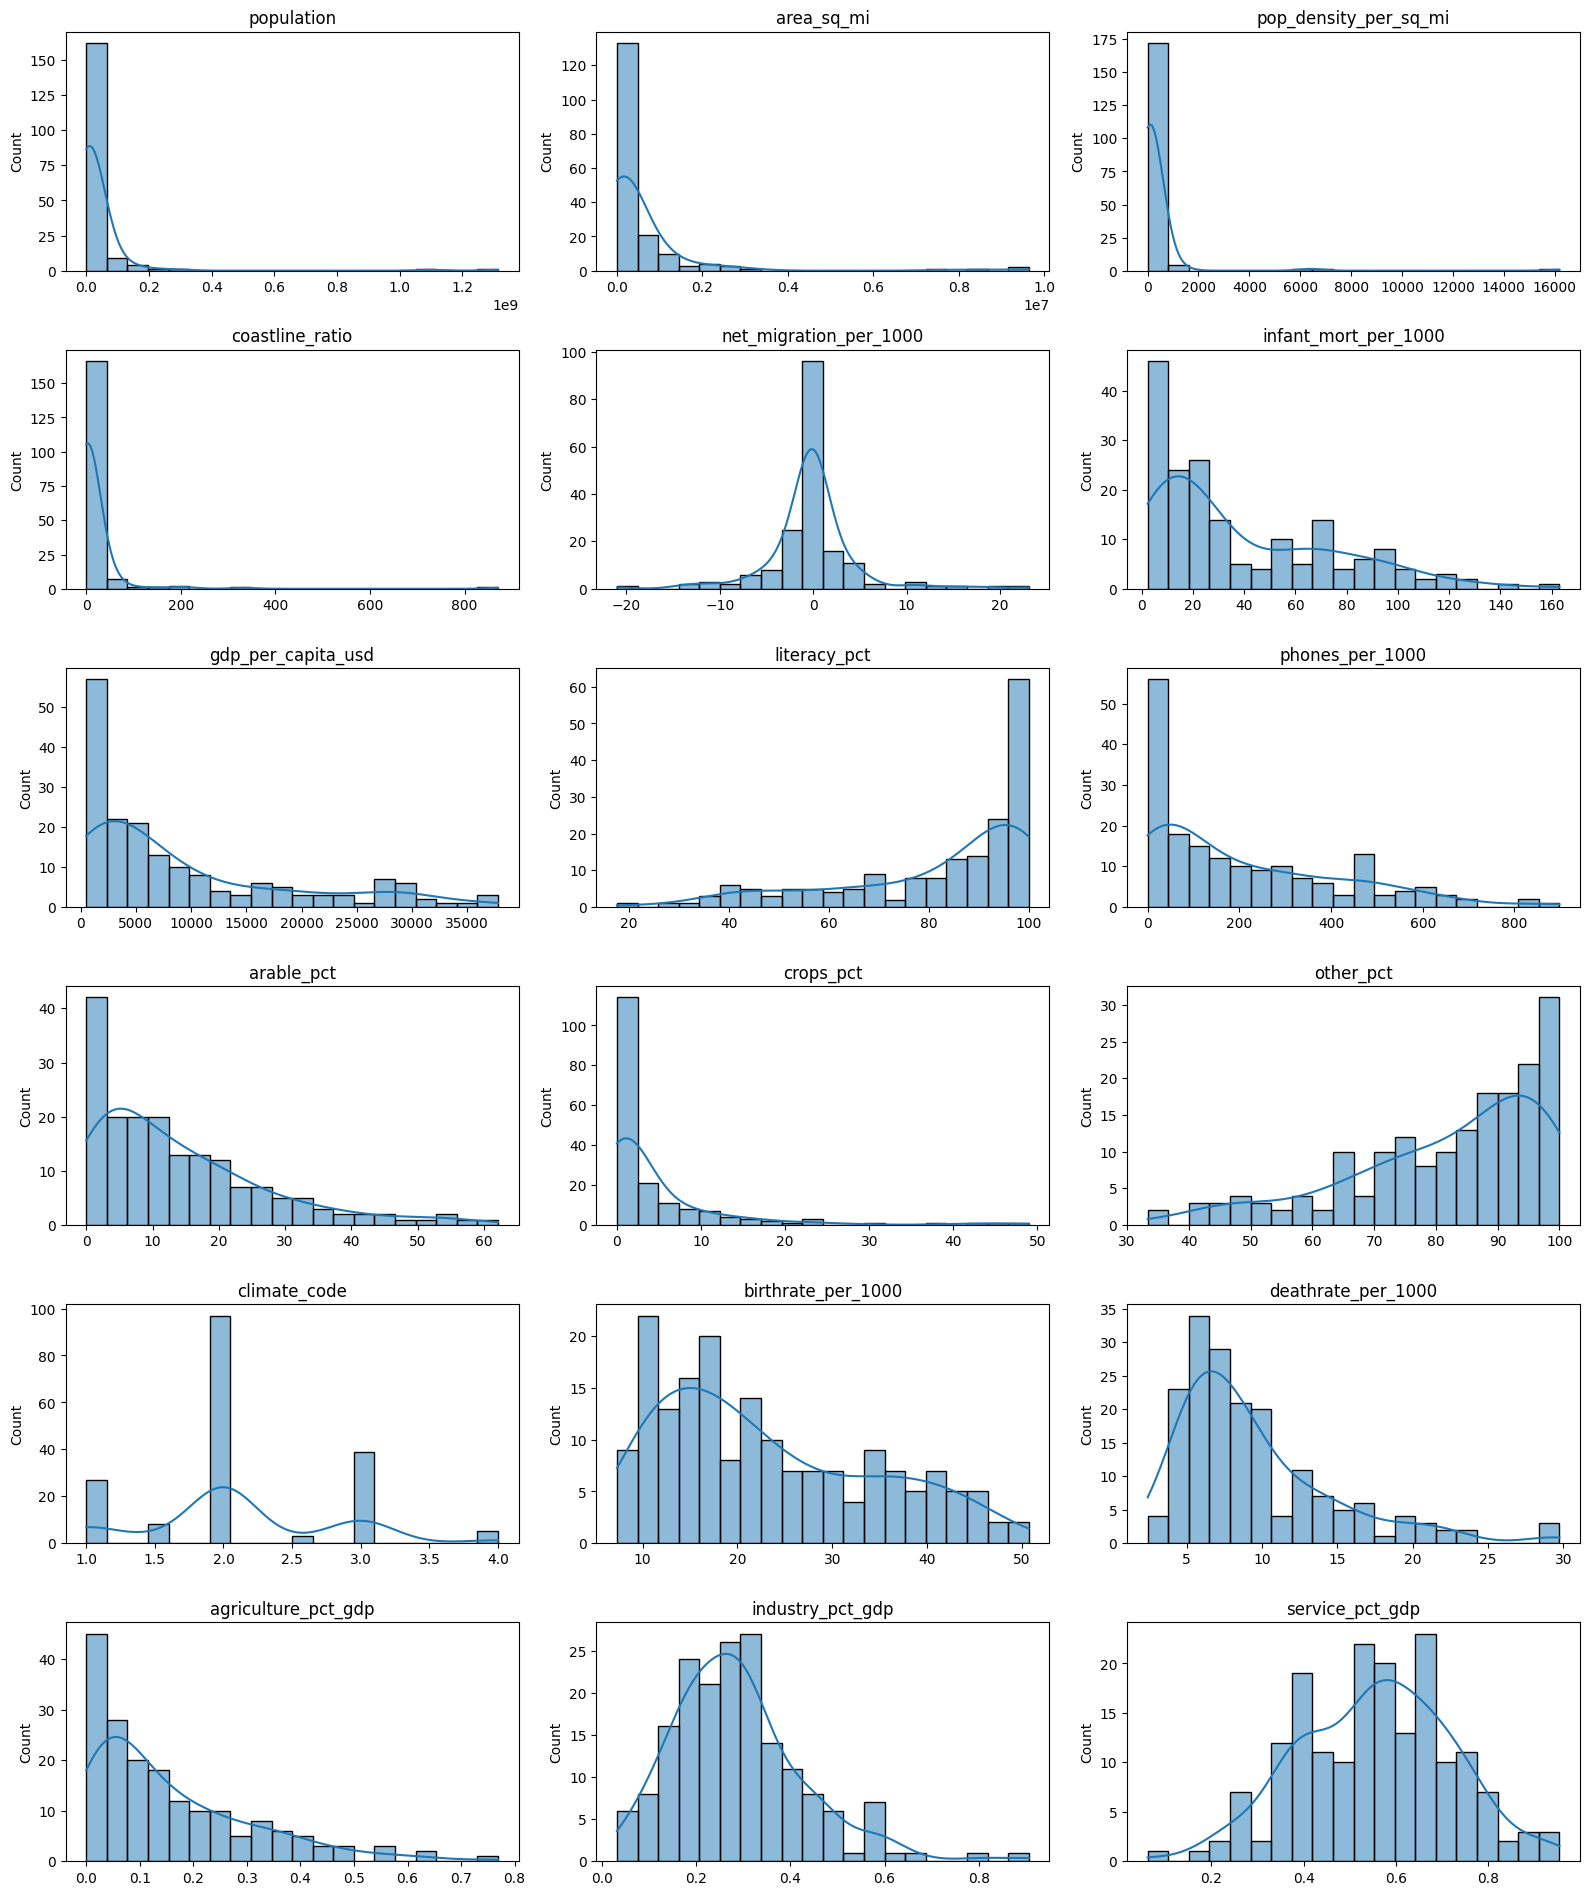

In [182]:

num_cols = data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(16, 22))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//3 + 1, 3, i)
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(col)
    plt.xlabel("")
    
plt.tight_layout()
plt.show()


In [183]:
data.query('phones_per_1000 > 700')

,country,region,population,area_sq_mi,pop_density_per_sq_mi,coastline_ratio,net_migration_per_1000,infant_mort_per_1000,gdp_per_capita_usd,literacy_pct,phones_per_1000,arable_pct,crops_pct,other_pct,climate_code,birthrate_per_1000,deathrate_per_1000,agriculture_pct_gdp,industry_pct_gdp,service_pct_gdp
22,Bermuda,NORTHERN AMERICA,65773,53,1241.0,194.34,2.49,8.53,36000.0,98.0,851.4,20.00,0.00,80.00,2.0,11.40,7.74,0.010,0.100,0.890
38,Cayman Islands,LATIN AMER. & CARIB,45436,262,173.4,61.07,18.75,8.19,35000.0,98.0,836.3,3.85,0.00,96.15,2.0,12.74,4.89,0.014,0.032,0.954
195,Sweden,WESTERN EUROPE,9016596,449964,20.0,0.72,1.67,2.77,26800.0,99.0,715.0,6.54,0.01,93.45,3.0,10.27,10.31,0.011,0.282,0.707
214,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,0.22,80.65,3.0,14.14,8.26,0.010,0.204,0.787


- Kraje o  wysokim PKB per capita, niemal pełnej alfabetyzacji (srednio kazdy po 98%), dużym udziale sektora usług znikomym udziale rolnictwa.W praktyce mozna powiedziec phones_per_1000 > 700 ze moze one wskazywac panstwa Developed., 2 z nich (bermudy i cayman islands to sa kraje wyspiarskie , raczej duza czesc mieszkancow jest bogata )

- Jednocześnie warto zauważyć, że żadne państwo z Afryki, Azji (poza wyspami offshore), Ameryki Południowej czy Europy Wschodniej nie zbliża się nawet do tego poziomu  podkreśla to raczej oczywista ogromną dysproporcję cyfrową między regionami świata np miedzy stanami a Krajami afryki albo europa  .

In [184]:
data.query('infant_mort_per_1000 > 80')

,country,region,population,area_sq_mi,pop_density_per_sq_mi,coastline_ratio,net_migration_per_1000,infant_mort_per_1000,gdp_per_capita_usd,literacy_pct,phones_per_1000,arable_pct,crops_pct,other_pct,climate_code,birthrate_per_1000,deathrate_per_1000,agriculture_pct_gdp,industry_pct_gdp,service_pct_gdp
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
13,Azerbaijan,C.W. OF IND. STATES,7961619,86600,91.9,0.00,-4.90,81.74,3400.0,97.0,137.1,19.63,2.71,77.66,1.0,20.74,9.75,0.141,0.457,0.402
21,Benin,SUB-SAHARAN AFRICA,7862944,112620,69.8,0.11,0.00,85.00,1100.0,40.9,9.7,18.08,2.40,79.52,2.0,38.85,12.22,0.316,0.138,0.546
23,Bhutan,ASIA (EX. NEAR EAST),2279723,47000,48.5,0.00,0.00,100.44,1300.0,42.2,14.3,3.09,0.43,96.48,2.0,33.65,12.70,0.258,0.379,0.363
31,Burkina Faso,SUB-SAHARAN AFRICA,13902972,274200,50.7,0.00,0.00,97.57,1100.0,26.6,7.0,14.43,0.19,85.38,2.0,45.62,15.60,0.322,0.196,0.482
39,Central African Rep.,SUB-SAHARAN AFRICA,4303356,622984,6.9,0.00,0.00,91.00,1100.0,51.0,2.3,3.10,0.14,96.76,2.0,33.91,18.65,0.550,0.200,0.250
40,Chad,SUB-SAHARAN AFRICA,9944201,1284000,7.7,0.00,-0.11,93.82,1200.0,47.5,1.3,2.86,0.02,97.12,2.0,45.73,16.38,0.335,0.259,0.406
45,Congo. Dem. Rep.,SUB-SAHARAN AFRICA,62660551,2345410,26.7,0.00,0.00,94.69,700.0,65.5,0.2,2.96,0.52,96.52,2.0,43.69,13.27,0.550,0.110,0.340
46,Congo. Repub. of the,SUB-SAHARAN AFRICA,3702314,342000,10.8,0.05,-0.17,93.86,700.0,83.8,3.7,0.51,0.13,99.36,2.0,42.57,12.93,0.062,0.570,0.369
49,Cote d'Ivoire,SUB-SAHARAN AFRICA,17654843,322460,54.8,0.16,-0.07,90.83,1400.0,50.9,14.6,9.75,13.84,76.41,2.0,35.11,14.84,0.279,0.171,0.550


### Interpretacja 

- **Dominacja Subsaharyjskiej Afryki** – większość krajów w tej grupie to m.in. Niger, Mali, Somalia, Sierra Leone, Guinea-Bissau, Liberia, Etiopia etc.  
  Jest to region o jednym z najsłabszych na świecie poziomów dostępu do opieki zdrowotnej, edukacji i stabilności politycznej.

- Kraje te charakteryzują zazwyczaj np:
  - bardzo niski GDP per capita,  
  - niski poziom alfabetyzacji,  
  - wysoki birthrate,  
  - wysokie deathrate

- Kilka państw spoza Afryki (np. Afganistan, Laos, Tadżykistan) również znajduje się w tej grupie z powodu podobnych problemów strukturalnych takich jak np oligarchizacja struktur politycznych (tadzykistan), bieda czy słaby system zdrowotny.

- Brak jakichkolwiek krajów z Europy, Ameryki Północnej czy Oceanii podkreśla oczywiste skrajne nierówności spoleczne. 

### Podsumowanie 

- **Większość zmiennych ma silnie prawoskośne rozkłady**, szczególnie:  
  population, area_sq_mi, pop_density_per_sq_mi, gdp_per_capita_usd, phones_per_1000.  
  Wynika to z dużych różnic rozwojowych oraz wielkości krajów.

- W wielu zmiennych występuje dużo outlierów, co powoduje mocno rozciągnięte ogony rozkładu np w population (skala w miliardach) kraje takie jak indie i chiny daleko od krajow ktore maja populacje po 200-300mln.

- Zmienne demograficzne (*birthrate_per_1000*, *infant_mort_per_1000*, *deathrate_per_1000*) mają szeroki rozrzut wartości, co odzwierciedla różnice między krajami rozwiniętymi a rozwijającymi się.

- Zmienne np  literacy_pct i service_pct_gdp są przesunięte w stronę wysokich wartości — większość krajów ma wysoki poziom alfabetyzacji oraz duży udział usług w gospodarce.

- Agriculture_pct_gdp i industry_pct_gdp pokazują wyraźny podział gospodarczy:
  kraje z dużym udziałem rolnictwa mają zwykle niski poziom uprzemysłowienia, co dobrze widać na rozkładach.

Ogólnie dane charakteryzują się silną asymetrią i dużym zróżnicowaniem, co jest typowe dla danych opisujących rozne kraje świata od wyspiarskich np Mikronezja po Afganistan, USA roznorodnosc rozkladow od bardzo skosnych w lewo, prawo nie powinan raczej dziwic.


In [185]:
data.groupby(["region"])[data.select_dtypes(include=[np.number]).columns.to_list()].mean().round(2)

,population,area_sq_mi,pop_density_per_sq_mi,coastline_ratio,net_migration_per_1000,infant_mort_per_1000,gdp_per_capita_usd,literacy_pct,phones_per_1000,arable_pct,crops_pct,other_pct,climate_code,birthrate_per_1000,deathrate_per_1000,agriculture_pct_gdp,industry_pct_gdp,service_pct_gdp
region,,,,,,,,,,,,,,,,,,
ASIA (EX. NEAR EAST),1.407166e+08,882097.08,1352.00,19.12,1.48,40.59,8600.00,81.68,177.13,16.08,4.09,79.82,1.96,20.56,7.63,0.17,0.31,0.52
BALTICS,1.799534e+06,54907.50,32.25,4.61,-2.70,8.71,11250.00,99.80,327.60,22.86,0.46,76.68,3.00,9.64,13.46,0.04,0.28,0.68
C.W. OF IND. STATES,1.327213e+07,499180.00,54.01,0.09,-2.52,47.71,3730.00,98.60,147.75,17.08,1.34,81.58,2.55,18.86,9.68,0.20,0.33,0.46
EASTERN EUROPE,1.533737e+07,143623.17,107.58,0.30,-1.38,14.92,9966.67,97.10,260.20,39.62,2.47,57.91,3.00,10.68,10.81,0.09,0.31,0.60
LATIN AMER. & CARIB,1.337346e+07,489086.71,141.20,13.79,-1.67,20.79,8583.33,90.33,262.64,10.75,5.19,84.06,2.04,19.17,6.41,0.09,0.26,0.65
NEAR EAST,1.554340e+07,360809.67,165.61,3.11,3.12,24.98,11825.00,77.36,207.63,8.22,1.94,89.84,1.33,24.86,4.61,0.06,0.46,0.48
NORTHERN AFRICA,4.066404e+07,1182266.67,51.60,0.33,-0.39,29.45,5633.33,67.30,111.17,7.98,4.82,87.19,1.67,18.53,4.99,0.13,0.42,0.45
NORTHERN AMERICA,1.492550e+08,4815736.50,636.00,97.28,2.95,7.52,36900.00,97.50,874.70,19.56,0.11,80.32,2.50,12.77,8.00,0.01,0.15,0.84
OCEANIA,2.675001e+06,707397.75,49.29,115.13,-2.34,21.73,9533.33,89.35,192.88,8.59,15.22,76.18,2.00,21.07,6.20,0.16,0.23,0.61


- grupowanie krajow po regionie i usrednianie wartosci daje te same wnioski np co do infant_mort_per_1000 (najwieksze w kontynentach biednych np SUB-SAHARAN AFRICA  ), czy literacy rate gdzie w krajach zachodzu np Western Europe ,Eastern a w afryce tylko 62 ,albo birthrate. 

In [186]:
from scipy.stats import shapiro


shapiro(data["net_migration_per_1000"])


ShapiroResult(statistic=0.7990819372222766, pvalue=2.0263944454047085e-14)

- raczej spodziewany wynik zmienna ma grube ogony (bardziej pasowalby rozklad NIG albo t-studenta) 

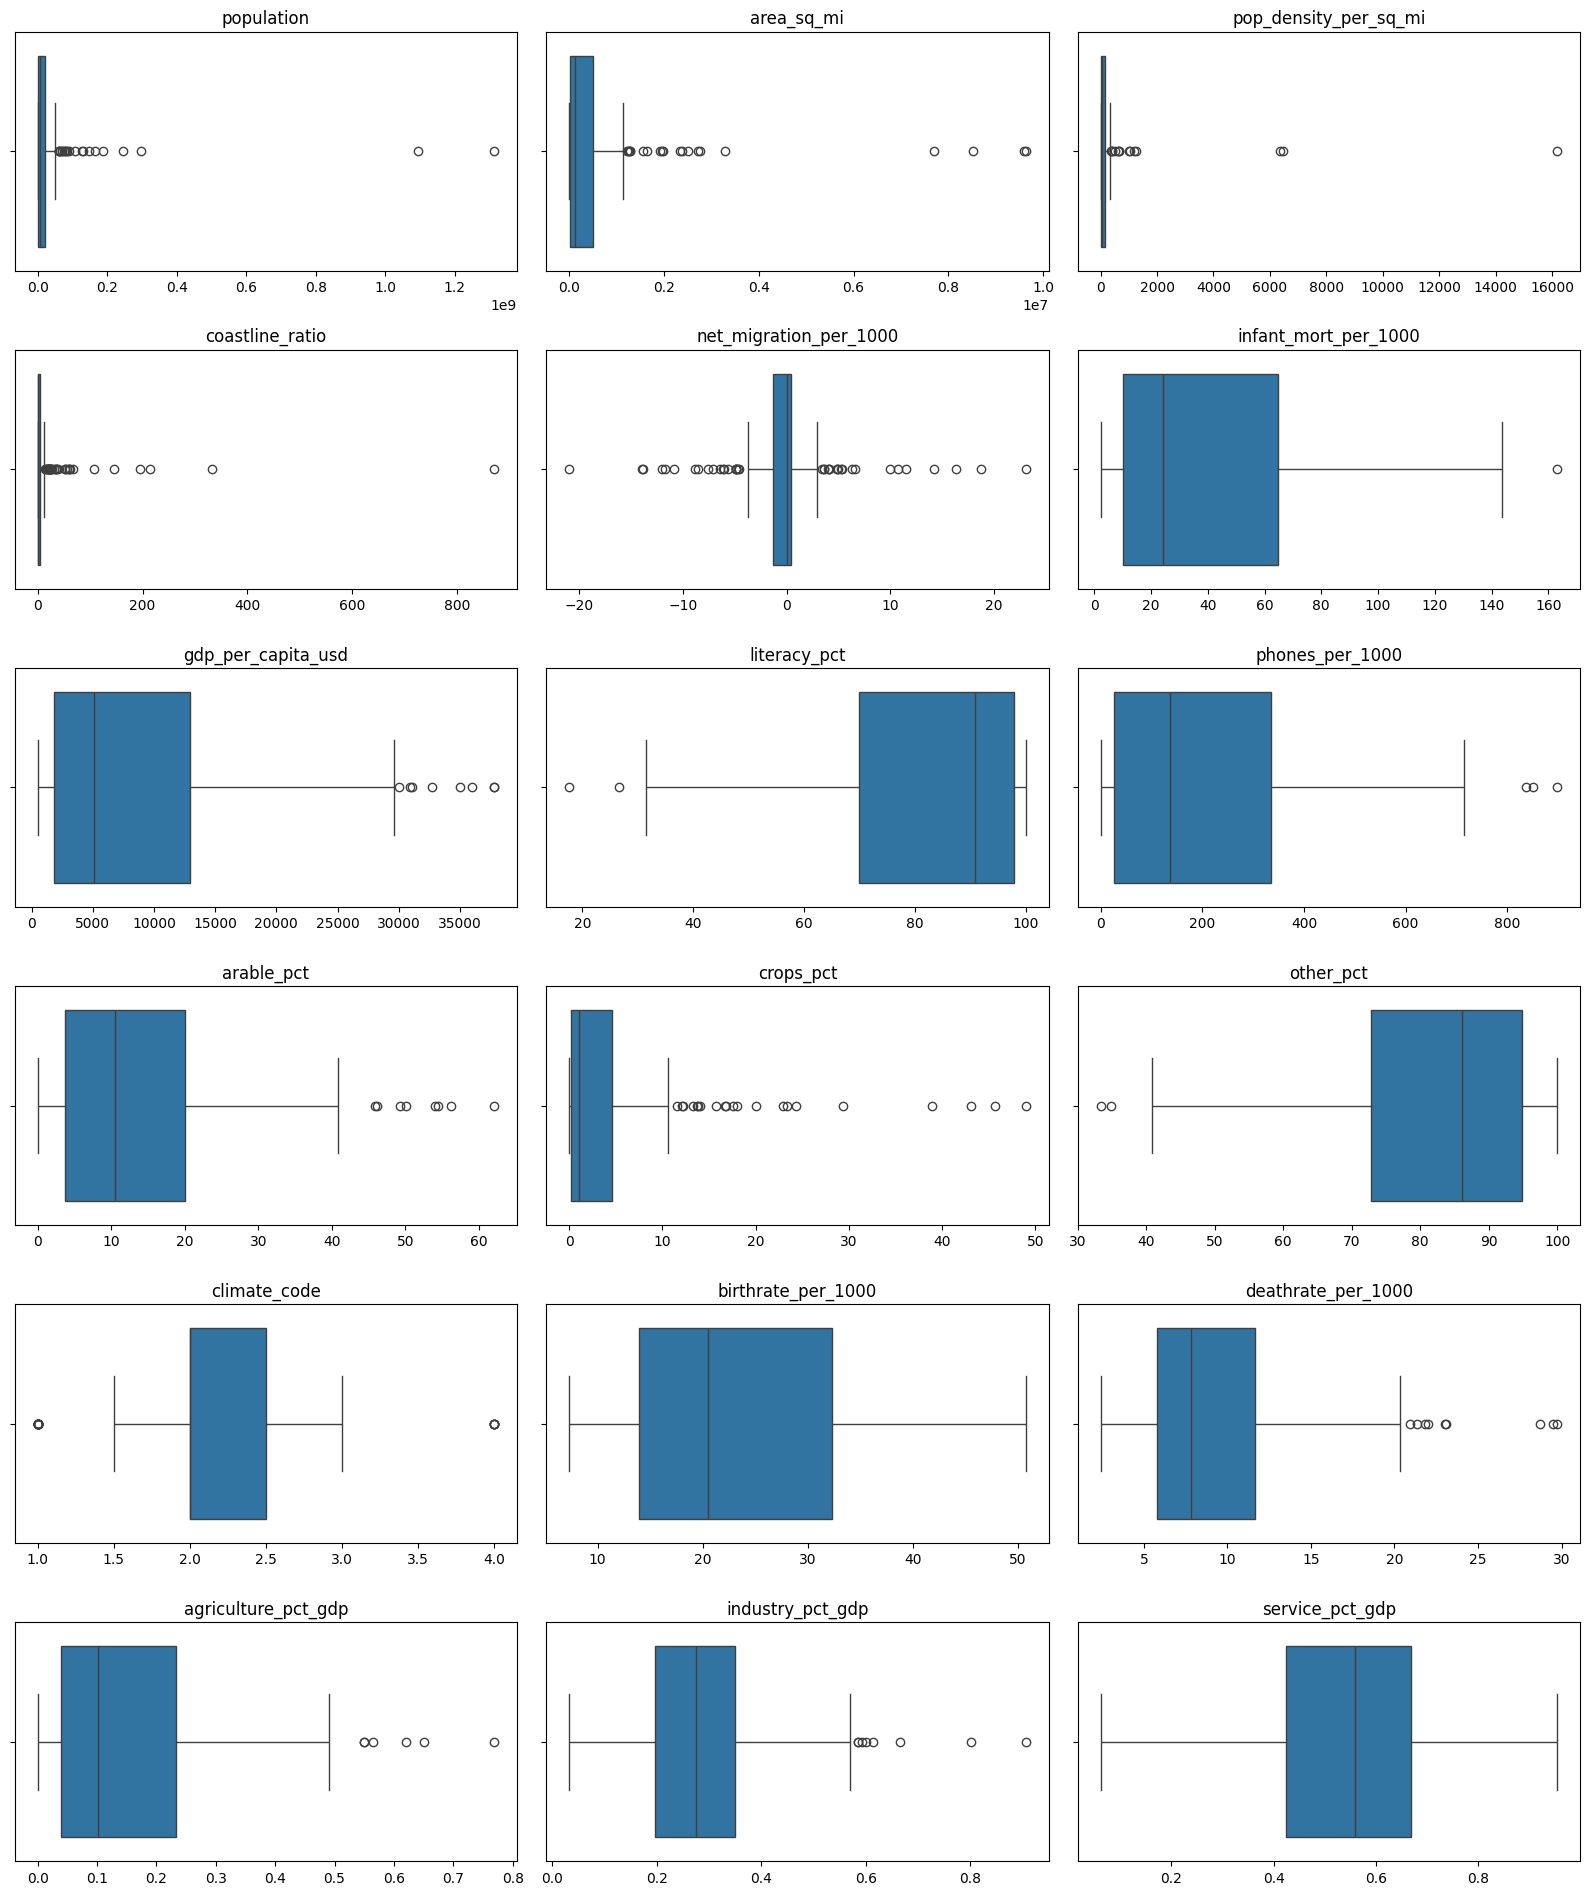

In [187]:
num_cols = data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(16, 22))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//3 + 1, 3, i)
    sns.boxplot(x=data[col])
    plt.title(col)
    plt.xlabel("")
    
plt.tight_layout()
plt.show()


- Widac ze jest troche outlierow w danych , jednakze ciezko bedzie usuwac je wszystkie bo  musielisbysmy po kolei z kazdej kolumny usuwac wartosci powyzej/ponizej wąsów plota a takze po ich usunieciu mozemy zostac z kilkoma krajami i analiza zbyt duzo nam nie pokaze, takze decydujemy sie zostawic wszystkie kraje. 

- Dodatkowo uzyjemy potem isolation forest do detekcji outlierow w danych ktorych jest bardziej robust metoda mniej heurystyczna.
 

In [188]:
data.query('infant_mort_per_1000 > 150')

,country,region,population,area_sq_mi,pop_density_per_sq_mi,coastline_ratio,net_migration_per_1000,infant_mort_per_1000,gdp_per_capita_usd,literacy_pct,phones_per_1000,arable_pct,crops_pct,other_pct,climate_code,birthrate_per_1000,deathrate_per_1000,agriculture_pct_gdp,industry_pct_gdp,service_pct_gdp
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.0,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.6,20.34,0.38,0.24,0.38


<Axes: >

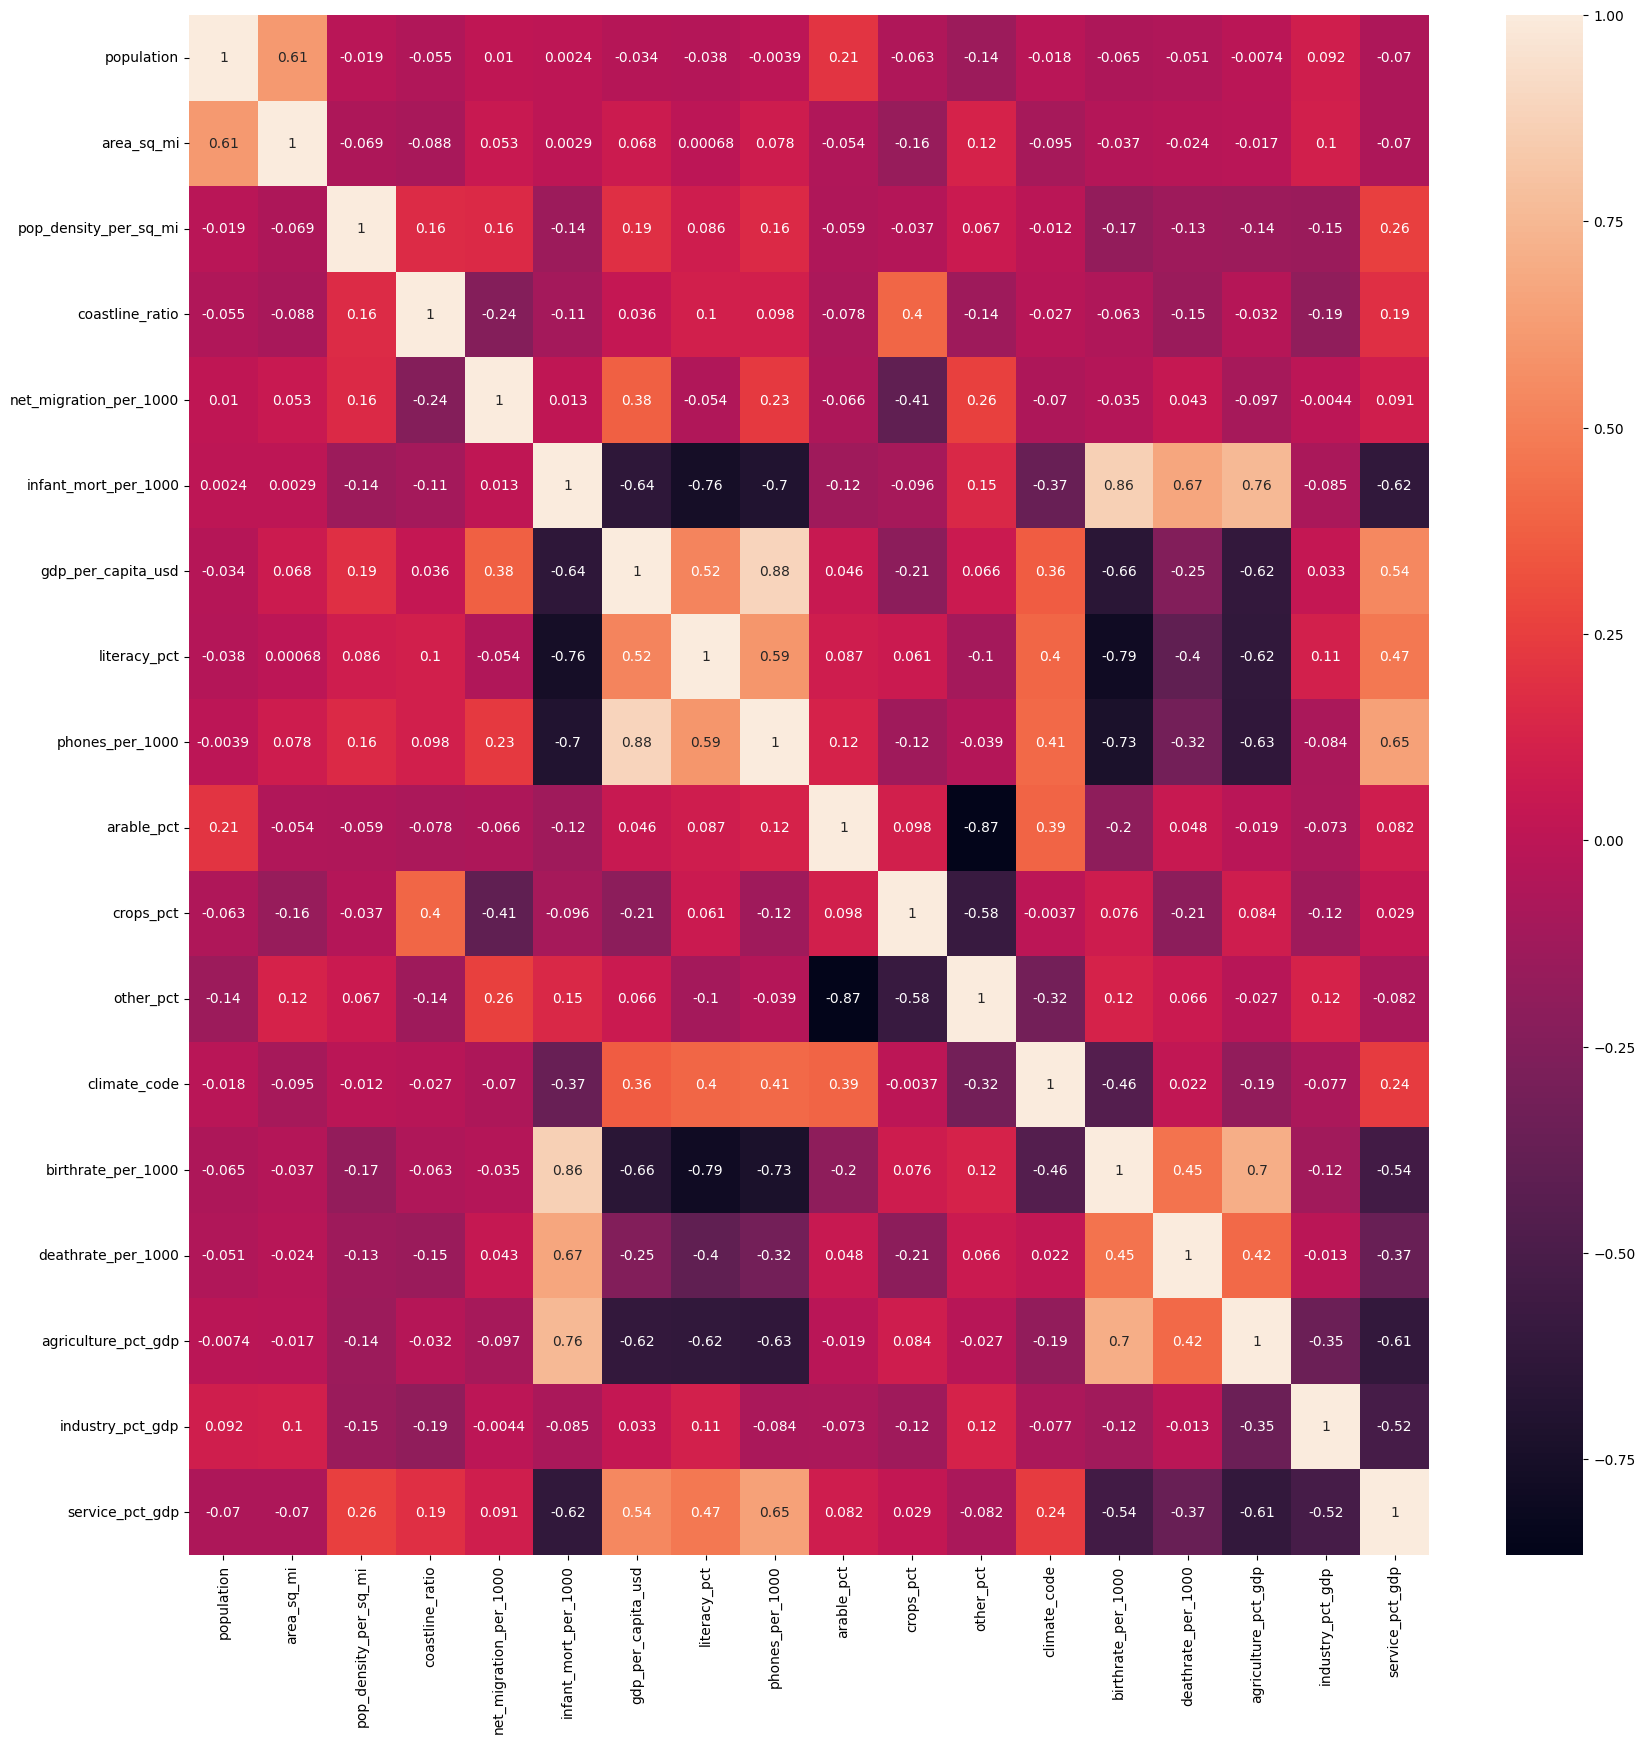

In [189]:


plt.figure(figsize=(20,20))


sns.heatmap(data.select_dtypes(include=[np.number]).corr(),annot=True)



### Najsilniejsze dodatnie korelacje

**GDP per capita Phones per 1000 (≈ 0.88)**  
Bogatsze kraje mają lepszą infrastrukturę technologiczną, ludzie na ogół wiecej zarabiają zatem maja za co kupic telefon.

**GDP per capita  Literacy (≈ 0.66)**  
Wyzszy poziom rozwoju gospodarki wiąze się z wyzszym poziomem edukacji.

**Phones per 1000 Literacy (≈ 0.59)**  
Lepsza edukacja idzie w parze z większym dostępem do technologii.

**Birthrate Infant mortality (≈ 0.86)**  
Kraje o wysokiej śmiertelności niemowląt mają takze wysoki przyrost naturalny, dotyka to krajow biednych w zdecydownej wiekszosci afryki.

### Najsilniejsze ujemne korelacje

**GDP per capita Infant mortality (≈ –0.76)**  
Bardziej rozwinięte kraje mają znacznie nizszą śmiertelność niemowląt, lepsza dostepnosc opieki medycznej, szpitali lekarzy etc.

**GDP per capita Birthrate (≈ –0.68)**  
Niski przyrost naturalny jest typowy dla krajów Developed np (Chiny,Japonia,Korea) i niektorych Emerging Markets np Polska.

**Birthrate ↔ Phones per 1000 / Literacy / GDP per capita (≈ -0.70 do -0.80)**  
Wysokie wartości birthrate są związane z:
- nizszym GDP per capita,  
- nizszą liczbą telefonów na 1000 mieszkańców,  
- nizszym poziomem edukacji.

Dodatkowo im nizszy udzial uslug w pkb tym jest wieksze infant mortality na 1000 osob 

Sugeruje to wyraźny podział na kraje rozwinięte (niski birthrate) i EM/Biedne (wysoki birthrate).

**Industry % GDP Agriculture % GDP (≈ –0.88)**  
Kraje z duzym udziałem rolnictwa mają niski poziom uprzemysłowienia. Np w krajach afryki dosyc czesto wystepuje 

### Ciekawe zalezności demograficzne

- Birthrate rośnie wraz z infant mortality i deathrate, co wskazuje na typowe profile krajów rozwijających się.
- Arable % i Crops % prawie nie korelują z innymi zmiennymi — struktura ziemi nie jest kluczowym czynnikiem rozwoju.

**Wazne**

Wszystkie opisane wcześniej zalezności nie są korelacjami pozornymi (spurious correlations).  
Ich istnienie potwierdzają zarówno badania ekonomiczne , jak i logika.

- **Teoria rozwoju gospodarczego** (np. Barro, Mankiw) pokazuje, ze wyzsze GDP per capita silnie wiąze się z wyzszą edukacją, dostępem do technologii oraz nizszymi wskaźnikami śmiertelności.
- **Teoria transformacji demograficznej** (Notestein, Caldwell) wyjaśnia, ze kraje rozwijające się mają wysokie birthrate i infant mortality, a kraje rozwinięte niskie.




## isolation forest 

- https://www.researchgate.net/publication/224384174_Isolation_Forest

- https://www.lamda.nju.edu.cn/publication/icdm08b.pdf

## Isolation Forest 

1. Tworzymy wiele losowych drzew (*isolation trees*):
   - wybieramy losowa kolumne,
   - losowa wartosc z przedzialu (min(x) max(x)).
2. Dla punktu $x$ mierzymy długość ścieżki $h(x)$ potrzebną do jego izolacji.
   - anomalie → mały $h(x)$  
   - normalne punkty → duży $h(x)$  
3. Ścieżki z wielu drzew uśredniamy:  
   $$
   E[h(x)] = \frac{1}{n_{\text{trees}}} \sum_{t=1}^{n_{\text{trees}}} h_t(x)
   $$

### Wzory Isolation Forest

#### 1. Oczekiwana długość ścieżki dla próby o rozmiarze \(n\):

szereg harmoniczny jako okreslenie expected sciezki:

$$
c(n) = 2\,H_{n-1} - \frac{2(n-1)}{n}
$$

$$
H_n = \sum_{k=1}^{n} \frac{1}{k}
$$


- `logika jest taka ze im szybcije cos zostalo wyizolowane, tym wieksza jest szansa na to ze ten punkt jes outlierem`

- Liczymy sciezke empiryczna / sciezka_expected i jesli punkt zostal szybko wyizolowany niz expected sciezka to jest szansa jest wieksza, im krotsza sciezka empiryczna tym szansa wieksza

- Liczymy na koncu dla kazdego punktu Score anomalii tzn

#### 2. Score anomalii
- Końcowy wynik jest znormalizowany tak, aby anomalie miały score blisko 1:

$$
s(x,n) = 2^{-\frac{E[h(x)]}{c(n)}}
$$


- i im blizej wartosc jest 1 tym wieksza szansa na to ze punkt jest outlierem


In [190]:
from sklearn.ensemble import IsolationForest

X = data[num_cols].copy()

iso = IsolationForest(n_estimators=300, # liczba drzew
    contamination='auto',  # dobor progu  ,algos sam dobiera 
    random_state=42 # (algorytm losuje kolumne wiec zebysmy nie dostali innych wynikow)
).fit(X)

data["is_outlier"] = iso.predict(X)

data["anomaly_score"] = iso.decision_function(X)

outliers = data[data["is_outlier"] == -1]
outliers


,country,region,population,area_sq_mi,pop_density_per_sq_mi,coastline_ratio,net_migration_per_1000,infant_mort_per_1000,gdp_per_capita_usd,literacy_pct,...,crops_pct,other_pct,climate_code,birthrate_per_1000,deathrate_per_1000,agriculture_pct_gdp,industry_pct_gdp,service_pct_gdp,is_outlier,anomaly_score
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,-1,-0.023324
16,Bangladesh,ASIA (EX. NEAR EAST),147365352,144000,1023.4,0.40,-0.71,62.60,1900.0,43.1,...,3.07,34.82,2.0,29.80,8.27,0.199,0.198,0.603,-1,-0.010954
38,Cayman Islands,LATIN AMER. & CARIB,45436,262,173.4,61.07,18.75,8.19,35000.0,98.0,...,0.00,96.15,2.0,12.74,4.89,0.014,0.032,0.954,-1,-0.007765
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,0.15,-0.40,24.18,5000.0,90.9,...,1.25,83.35,1.5,13.25,6.97,0.125,0.473,0.403,-1,-0.047530
44,Comoros,SUB-SAHARAN AFRICA,690948,2170,318.4,15.67,0.00,74.93,700.0,56.5,...,23.32,40.81,2.0,36.93,8.20,0.400,0.040,0.560,-1,-0.001293
91,Hong Kong,ASIA (EX. NEAR EAST),6940432,1092,6355.7,67.12,5.24,2.97,28800.0,93.5,...,1.01,93.94,2.0,7.29,6.29,0.001,0.092,0.906,-1,-0.003578
94,India,ASIA (EX. NEAR EAST),1095351995,3287590,333.2,0.21,-0.07,56.29,2900.0,59.5,...,2.74,42.86,2.5,22.01,8.18,0.186,0.276,0.538,-1,-0.052660
117,Liberia,SUB-SAHARAN AFRICA,3042004,111370,27.3,0.52,0.00,128.87,1000.0,57.5,...,2.28,93.77,2.0,44.77,23.10,0.769,0.054,0.177,-1,-0.004236
122,Macau,ASIA (EX. NEAR EAST),453125,28,16183.0,146.43,4.86,4.39,19400.0,94.5,...,0.00,100.00,2.0,8.48,4.47,0.001,0.072,0.927,-1,-0.042766
136,Micronesia. Fed. St.,OCEANIA,108004,702,153.9,870.66,-20.99,30.21,2000.0,89.0,...,45.71,48.58,2.0,24.68,4.75,0.289,0.152,0.559,-1,-0.088776


Mozna wyróznić trzy główne grupy outlierow:

### 1. Kraje skrajnie biedne/niestabilne gospodarczo/politycznie **Afghanistan, Bangladesh, Liberia, Comoros, India**

Cechy:
- bardzo wysoka infant mortality,
- wysoki birthrate,
- niskie GDP per capita,
- niska liczba telefonów i niski literacy,
- ogromne populacje (np. Indie) lub przeciwnie: bardzo małe, ale biedne państwa.
- Indie są najludniejszym panstwem na swiecie a jednoczesnie maja literacy rate na poziomie 60% bardzo podobne do sredniej krajow afryki np subsaharyjskiej

### 2. Małe państwa wyspiarskie : **Cayman Islands, Micronesia, Comoros**

Cechy:
- bardzo wysoki coastline_ratio,
- mała powierzchnia całkowita,
- nietypowo wysokie gęstosci zaludnienia.

### 3. Kraje ekstremalnie bogate lub nietypowe gospodarczo
Przykłady: **Qatar, Hong Kong, Macau, United States**

Cechy:
- bardzo wysokie GDP per capita (Qatar, Macau),
- ekstremalnie wysokie pop_density (Hong Kong, Macau),
- unikatowe struktury gospodarek,
- duza skala populacji i gospodarki (USA).

### Podsumowanie
- skrajna bieda i słabe wskaźniki zdrowotne,
- skrajny dobrobyt i bardzo wysokie PKB,
- ekstremalna urbanizacja lub gęstosć zaludnienia,
- nietypowa struktura geograficzna,
- ogromna skala populacji lub gospodarki.




# MDS 

- Bardzo wolne both algosy maja w klasycznej implementacji sa N(n^3) w praktyce juz totalnie wymarly, nie sa uzywane 

## Niemetryczne skalowanie wielowymiarowe 

## opis algosa






Non-metric MDS odwzorowuje kolejność rang odległości między punktami, a nie ich rzeczywiste wartości.

1. Liczy macierz odległości NxN w high dimension  
   (np. odległość między każdym krajem a każdym innym).

2. Zamienia odległości na rangi
   – nie interesuje go ile wynosi odległość, tylko kto jest bliżej/kto dalej:
   - 1 = najbliższy sąsiad,
   - 2 = drugi najbliższy,
   - … itd.

3. Intial guess
   - Losowe ułożenie punktów w 2D.

4. Liczenie odległości między punktami w 2D  
   - Po initial guess liczymy odleglosci ich miedzy soba i zamieniamy na rangi.  

5. **Minimalizuje STRESS**  
   – czyli przesuwa punkty, aby kolejność odległości była zachowana.

5. Powtarza kroki 4–5, aż STRESS przestanie spadać, czyli jest jakis converge parametr gdzie jestli funkcja stress nie rusza sie albo zmniejsza sie o 0.00001 to break optymalizacje.

- intuicyjnie :

1. W high-dimension liczymy macierz odległości NxN i zamieniamy ją na rangi
   (liczy się tylko kolejność: kto bliżej, kto dalej).

2. Losowo inicjalizujemy punkty w 2D i liczymy ich odległości.

3. Algorytm przesuwa punkty tak, aby rangi odległości w 2D były jak najbardziej zgodne z rangami odległości w high-dimension.

4. Minimalizuje STRESS, aż kolejność odległości będzie możliwie najlepiej odwzorowana.

- W skrócie: zachowuje kolejność bliskosci punktow, nie odleglosc miedzy nimi.
 

In [191]:
from sklearn.preprocessing import StandardScaler
num_cols = data.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[num_cols].copy())

In [192]:
from sklearn.manifold import MDS
import plotly.express as px

mds = MDS(n_components=2,dissimilarity='euclidean',random_state=42,metric=False)

mds_coords = mds.fit_transform(X_scaled)

mds_df = pd.DataFrame({"MDS1": mds_coords[:, 0],"MDS2": mds_coords[:, 1],"region": data["region"],"country": data["country"]})

fig = px.scatter(mds_df,x="MDS1",y="MDS2",color="region",hover_name="country",color_discrete_sequence=px.colors.qualitative.Set3,width=1500,height=1200)

fig.update_traces(marker=dict(size=12, opacity=0.9))

fig.update_layout(plot_bgcolor="white",paper_bgcolor="white",xaxis=dict(showgrid=True, gridcolor="#e0e0e0"),yaxis=dict(showgrid=True, gridcolor="#e0e0e0"),legend_title_text="Region")

fig.show()



## prons cons 

### Plusy
- Dobrze radzi sobie, gdy dane sa nielinionwo zalezne, jest w stanie lepiej taka strukutre uchwycic. 
- Nie trzeba skalowac danych
- Dobrze (at least na tym datasecie) pokazuje outliery.

### Minusy
- Nie zachowuje rzeczywistych odległości — tylko rangi, więc globalny układ może być zniekształcony.
- Nadal wymaga macierzy NxN → **złożoność ~ O(n²)**.
- Wynik zależy od inicjalizacji i może być mniej stabilny niż metric MDS, przez to moze byc po prostu niestabilny podobny problem T-sne gdy nie robimi inicializji poprzez PCA.
- Compexity ~ O(n^2) 

## interpretacja wynikow algosa


- Większość punktów jest mocno ściśnięta w centrum co oznacza, że wiele krajów ma podobne rangi odległości.  
  Non-metric MDS nie wychwytuje lokalnych struktur — dlatego w przeciwieństwie do UMAP nie pokazuje dokładnych relacji między poszczególnymi krajami.

- Algorytm dobrze uchwycił globalne różnice np. kraje Europy Zachodniej vs. kraje Afryki Subsaharyjskiej — są one wyraźnie odsunięte od siebie.

- Outliery na obrzeżach to kraje o skrajnych wartościach cech, np.  
  - Indie wysoka populacja, niski literacy rate, niski GDP per capita;  
  - USA wysokie literacy, bardzo wysokie GDP per capita;  
  - kraje bardzo ubogie lub bardzo rozwinięte.  
  Non-metric MDS wypycha je na zewnątrz, bo mocno odstają pod względem rang odległości.

- Model radzi sobie z rozróżnianiem „bardzo różnych” krajów ale nie z precyzyjnym odwzorowaniem lokalnych klastrów.

### Ogólny wniosek
Non-metric MDS zachowuje jedynie rangi odległości, przez co:
- pokazuje poprawnie duże, globalne różnice,
- ale gubi lokalną strukturę i ściska większość krajów w jednej chmurze,
- działa znacznie gorzej lokalnie i globalnie niż UMAP/t-SNE dla analizy podobieństw między państwami.


## metryczne  

## opis algosa 

- Liczy macierz odległości NxN w przestrzeni wysokowymiarowej,
- a następnie znajduje takie położenie punktów w 2D, żeby w low dimension odleglosi byly jaknajblizsze tym w high dimension.

Optymalizuje w tym celu funkcję STRESS, czyli błąd pomiędzy odleglosciami w high i low dimension

Im mniejszy STRESS, tym lepsza rekonstrukcja odległości.

$$
\text{STRESS} = 
\sqrt{
\frac{
\sum_{i,k} \left( d_{ik} - \hat{d}_{ik} \right)^2
}{
\sum_{i,k} d_{ik}^2
}}
$$

- Generalnie scikit-learn uzywa do optymalizacji SGD to pomaga w redukcji complexity algorytmu, ale nadal robienie macierzy NxN jest approx O(n^2), to jest glowmy powod dlaczego nie uzywa sie w praktyce MDS

In [193]:
mds = MDS(n_components=2,dissimilarity='euclidean',random_state=42,metric=True)

mds_coords = mds.fit_transform(X_scaled)
mds_df = pd.DataFrame({"MDS1": mds_coords[:, 0],"MDS2": mds_coords[:, 1],"region": data["region"],"country": data["country"]})


fig = px.scatter(mds_df,x="MDS1",y="MDS2",color="region",hover_name="country",color_discrete_sequence=px.colors.qualitative.Set3,width=1500,height=1200)

fig.update_traces(marker=dict(size=12, opacity=0.9))

fig.update_layout(
    plot_bgcolor="white",
    paper_bgcolor="white",
    xaxis=dict(showgrid=True, gridcolor="#e0e0e0"),
    yaxis=dict(showgrid=True, gridcolor="#e0e0e0"),
    legend_title_text="Region"
)

fig.show()

## prons cons 

### Plusy
- Bardzo prosty w implementacji i intuiciyjny szybki do zrozumienia
- Lepszy niż PCA dla danych z nieliniowymi odleglosciami.
- Stabilny – wynik nie zależy mocno od parametrów np perplexity/ albo brak losowosci w postaci .
- Dobrze oddaje ogólny kształt danych, co widac na wykresie.

###  Minusy
- complexity~ \(O(n^2)\) (macierz odległości NxN) a nawet O(n^3).
- Słabo odwzorowuje lokalne dystanse punkty układają się w jeden zbity klaster gdzie np (izrael jest kolo estonii czego nie ma w umap)
- Nie zachowuje lokalnych zależności i globalnych tak dobrze jak UMAP co bedzie widac nizej.



## interpretacja wynikow algosa 

- Kraje bardzo podobne do siebie znajdują się blisko centrum, natomiast kraje wyraźnie różniące się profilem (np. skrajnie niskie lub wysokie wskaźniki społeczno-ekonomiczne) leżą na obrzeżach.

- Kraje Afryki Subsaharyjskiej tworzą zauważalne skupisko w dolnych partiach wykresu,co odzwierciedla ich podobny zestaw wskaźników (wysoki birthrate, infant mortality, niski GDP ).

- Kraje rozwinięte są bardziej rozproszone, ponieważ różnią się między sobą bardziej strukturalnie (np. migracja, struktura PKB, gęstość zaludnienia).

- Generalnie Afryki Subsaharyjska i eurpoa zachodnia sa w miare ok pokazane najwiekszy minus kraje po prostu na siebie nachodza 


# PCA 

## opis algosa 

PCA przekształca dane tak, aby znaleźć kierunki o największej wariancji i ułożyć dane wzdłuż tych kierunków.

### 1. Obliczenie macierzy kowariancji

$$
\Sigma = \frac{1}{n-1} X^\top X
$$


### 2. Wyznaczenie wartości własnych i wektorów własnych
Rozwiązujemy równanie: ( matrix decomposition)

$$
\Sigma v = \lambda v
$$

- v wektor własny **kierunek komponentu (oś PCA)**  
- lambda wartość własn **ile wariancji ten komponent wyjaśnia**

### 3. Sortowanie komponentow

Wektory własne sortujemy malejąco według lambda 

- PCA1 — kierunek o max wariancji  
- PCA2 — drugi największy kierunek  
- ...
- PCAN

### 4. Nowe współrzędne to:

$$
Z = X \cdot V
$$

gdzie \(V\) to macierz wektorów własnych.

Dostajemy dane w nowym układzie współrzędnych (PCA1, PCA2, PCN),które zachowują jak najwięcej informacji.

### Intuicyjnie

- Najpierw centrujemy dane względem origin (odejmujemy średnią).

- PCA fittuje regresje ktora przechodzi przez origin, i najlepiej dopasowuje siędo danych i wyjaśnia największą możliwą wariancję i to jest komponent 1 .

- Następnie szukamy kolejnego kierunku, który jest ortogonalny do pierwszego, wyjaśnia drugą największą wariancję i to jest PCA2

- a dekompozycja macierzy daje mi wektory wlasnie i wartosci wlasne macierzy gdzie:

- Wektory własne okreslaja kierunki komponentów PCA (osie PCA)

- Wartości własne mówia, ile wariancji każdy komponent wyjasnia

- Każdy kolejny komponent wyznaczamy identycznie jak w kroku i on maksymalizuje pozostałą wariancję, i jest ortogonalny do poprzednich.




## prons cons 



In [194]:
data=data.drop(columns=['is_outlier','anomaly_score','climate_code'])


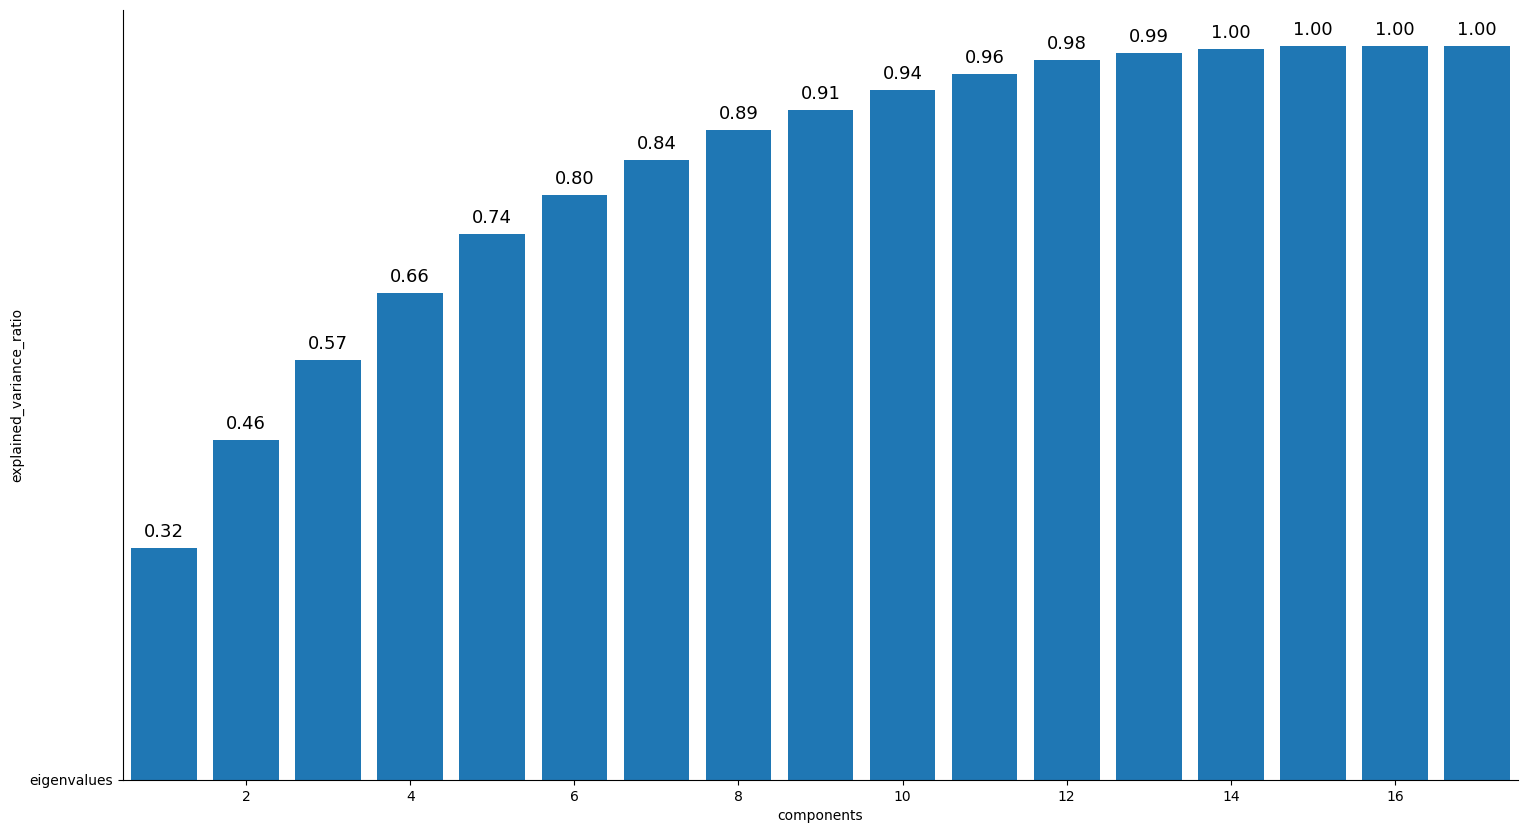

In [195]:
from sklearn.decomposition import PCA


num_cols = data.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[num_cols].copy())

pca = PCA()
pca_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(pca_components,columns=[f"PCA{i+1}" for i in range(len(num_cols))])
pca_df["country"] = data["country"].values
pca_df["region"] = data["region"].values


plt.figure(figsize=(18,10))
cum_var = np.cumsum(pca.explained_variance_ratio_)
plt.bar(list(range(1, len(pca.explained_variance_ratio_) + 1)), cum_var)


for i, v in enumerate(cum_var):
    plt.text(list(range(1, len(pca.explained_variance_ratio_) + 1))[i],v + 0.01,f"{v:.2f}",ha="center",va="bottom",fontsize=13)
sns.despine()
plt.xlabel("components")
plt.ylabel("explained_variance_ratio")
plt.ylim(0, 1.05) 
plt.xlim(0.5, len(cum_var) + 0.5)
plt.plot("eigenvalues")
plt.grid(False)
plt.show()



- explained variance ratio jest dosyc male dla 2 komponentow to tylko 46% nie bedzie to dobrze odwzorowywac oryginalnej struktury danych przyhmuje sie heurystycznie ze 80-90% jest ok 
- umap pokaze nizej ze jest sens rzeczywiscie do jakiegos modelu nie wizualizacji wzaic te 6-7 komponentow. 

## eigenvectors  

In [208]:

eigenvectors = pca.components_  
eigenvectors_df = pd.DataFrame(eigenvectors,columns=num_cols,index=[f"PCA{i+1}" for i in range(len(eigenvectors))])

display(eigenvectors_df)

,population,area_sq_mi,pop_density_per_sq_mi,coastline_ratio,net_migration_per_1000,infant_mort_per_1000,gdp_per_capita_usd,literacy_pct,phones_per_1000,arable_pct,crops_pct,other_pct,birthrate_per_1000,deathrate_per_1000,agriculture_pct_gdp,industry_pct_gdp,service_pct_gdp
PCA1,-0.002505,-0.009334,-0.104120,-0.059142,-0.057570,0.398722,-0.347006,-0.343934,-0.372731,-0.060137,0.007388,0.045407,0.387294,0.243687,0.357028,-0.005554,-0.320980
PCA2,0.009751,0.168511,0.043948,-0.264914,0.359694,0.066534,0.176975,-0.048786,0.077259,-0.360714,-0.494947,0.543243,0.006390,0.100094,-0.091659,0.180135,-0.069380
PCA3,0.529107,0.443196,-0.235781,-0.272201,-0.013450,-0.031639,-0.008208,0.038972,-0.006598,0.360817,-0.094402,-0.247246,-0.106476,0.034119,-0.061645,0.345928,-0.234366
PCA4,-0.114145,-0.031474,-0.191176,0.121144,-0.380992,-0.154923,-0.171607,0.181719,-0.179205,-0.378885,0.207153,0.205341,-0.061497,-0.261301,-0.185758,0.514320,-0.267007
PCA5,0.458754,0.523503,0.221216,0.372384,-0.111856,0.011004,-0.072344,-0.070461,-0.013329,-0.298959,0.133105,0.177304,0.068590,-0.215774,0.093681,-0.286303,0.156001
PCA6,0.083798,-0.132922,0.796333,0.159765,0.237595,0.030290,-0.000225,-0.095122,-0.120388,0.111859,0.063843,-0.123437,-0.011726,-0.053958,-0.081416,0.370471,-0.236595
PCA7,-0.037579,0.092771,-0.139331,0.598314,-0.056419,0.169338,0.302427,0.045503,0.256753,-0.012059,0.038600,-0.009500,-0.019400,0.603724,-0.035136,0.193515,-0.126524
PCA8,-0.032550,0.010691,-0.353732,0.143134,0.629414,-0.022144,0.208601,-0.216547,0.095730,-0.086991,0.368726,-0.114237,0.200359,-0.364707,0.052607,0.092381,-0.126318
PCA9,-0.206879,0.284797,0.213349,-0.398023,0.018537,-0.011821,0.168133,0.368211,0.125953,-0.209074,0.444348,-0.052392,-0.083145,0.190906,0.364830,-0.097905,-0.249016
PCA10,-0.041424,-0.078051,-0.060570,0.313183,0.047418,-0.075048,-0.006866,0.253393,0.019910,0.165563,-0.401695,0.066628,-0.259933,-0.304502,0.542095,-0.120513,-0.394996


## Interpretacja wektorów własnych 

- Jest ich troche duzo zatem ogranicze sie do kilku pierwszych.

### PCA1 “rozwój społeczno-ekonomiczny”
Najważniejsze wartosci:
- (+) birthrate_per_1000 infant_mort_per_1000 deathrate_per_1000
- (+) agriculture_pct_gdp, arable_pct, crops_pct
- (–) gdp_per_capita_usd literacy_pct phones_per_1000 service_pct_gdp

> Wysoki PCA1 = kraje biedniejsze, rolnicze, z wysoką śmiertelnością i niską edukacją  
> Niski PCA1 = kraje bogate, wykształcone, z gospodarką opartą na usługach

### PCA2 “geografia + struktura demograficzna”
Najważniejsze loadings:
- (+) area_sq_mi arable_pct crops_pct
- (–) pop_density_per_sq_mi coastline_ratio

> Oddziela kraje duże powierzchniowo, rolnicze  od krajów małych, gęsto zaludnionych lub wyspiarskich.

### PCA3 komponent “struktura gospodarki”
Najważniejsze loadings:
- (+) industry_pct_gdp , some agriculture , other_pct (słabo)
- (–) service_pct_gdp m phones_per_1000 , literacy_pct

> Dzieli kraje na oparte na przemysle uslugach.  

Wysoki PCA3  kraje z dużym udziałem przemysłu  
Niski PCA3  kraje zdominowane przez sektor usług.

> **PCA1**: **Development** — od biednych krajów rolniczych do bogatych opartych na uslugach 

> **PCA2**: **Geografia** duże rolnicze kraje vs małe/wyspiarskie gesto zaludnione.

> **PCA3**: **Struktura gospodarki** — przemysł vs usługi.

> **PCA4**: **Rolnictwo + demografia**  kraje rolnicze vs kraje urbanizujące się.

> **PCA5**: **Położenie** wybrzeże vs interior / rolnictwo.



In [196]:
import plotly.express as px

fig = px.scatter(pca_df,x="PCA1",y="PCA2",color="region",hover_name="country",color_discrete_sequence=px.colors.qualitative.Set3,width=1500,height=1200)

fig.update_traces(marker=dict(size=12, opacity=0.9))

fig.update_layout(plot_bgcolor="white",paper_bgcolor="white",xaxis=dict(showgrid=True, gridcolor="#e0e0e0"),yaxis=dict(showgrid=True, gridcolor="#e0e0e0"),legend_title_text="Region")

fig.show()


### interpretacja wynikow algosa

### 1. componenent 1 (oś pozioma)
- Po prawej stronie dominują kraje Afryki Subsaharyjskiej.  
- Po lewej są głównie kraje Europy Zachodniej, Północnej Ameryki i Oceanii.
- componenent 1 więc oddziela kraje rozwinięte (lewo) od słabo rozwiniętych (prawo).

### 2. componenent 2 (oś pionowa)
- Dolna część to głównie kraje wyspiarskie i rolnicze (np. Oceania, część Afryki).
- Górna część zawiera kraje z Bliskiego Wschodu (Near East) oraz Eastern Europe.
- componenent 2 odzwierciedla róznice krajow w rozowju gospodarczym i demografii.

### 3. Rozkład regionów
- **Western Europe** – trzyma się lewej strony wykresu, niewielka rozpiętość → kraje bardzo podobne.
- **Eastern Europe** – centrum wykresu, niewielkie zróznicowanie → średnie quality of life.
- **Latin America & Caribbean** – rozmyty środek → zróznicowana jakość zycia / gospodarka.
- **Sub-Saharan Africa** – największe skupienie po prawej → najbardziej odrózniający się region najgorsze quality of life / kraje biedne slabo rozwinete.
- **Near East i kraje Zatoki** – góra wykresu → wysokie wartosci migracji, niestandardowa struktura gospodarki ( np duzy udzial przemyslu w GDP).
- **Asia (ex. Near East)** – duza rozpiętość → od słabo rozwiniętych (prawo) po bogate (lewo-góra).

### 4. Najwazniejsze obserwacje
- Regiony są częściowo rozdzielone, ale PCA nie tworzy odzielnych klastrow, tylko sa bardziej zlepione widac 3 klasty z Sub-Saharan Africa , Latin America & Caribbean i western europe, jednak wszystkie dosyc mocno nachodza na siebie. To najwiekszy minus
- prawa dolna część słabe jakościowo kraje rolnicze, wyspiarskie, niskie PKB, wysoka śmiertelność,
- lewa górna część rozwinięte gospodarki.

### 5. Ogolne wnioski
> component 1 = główna oś rozwoju gospodarczego / jakości zycia.  
> component 2 = róznice demograficzno-geograficzne (rolnictwo vs migracje / gospodarki usługowe).


## pros cons PCA

### plusy
- wzglednie szybki approx ~O(n · d²),
- Redukuje wymiar przy minimalnej utracie informacji (jesli sa skorelowane najlepiej silnie) pierwsze komponenty wyjaśniają większość wariancji.
- Działa deterministycznie — brak losowości (inaczej niż t-SNE/UMAP).
- Znajduje latent linear paterns w strukturze danych np główne kierunki wariancji często odpowiadają ważnym „czynnikom” (np. rozwój kraju).

### minusy
- Zakłada liniowość — PCA wykrywa tylko kierunki liniowej wariancji, nie radzi sobie ze strukturami nieliniowymi (UMAP/t-SNE robią to lepiej). (remedium Kernel PCA)
- Trzeba skalowac 
- Nie zachowuje lokalnych struktur — kraje podobne mogą być daleko od siebie, jeśli różnią się globalnie.
- Wrażliwe na outliery — skrajne obserwacje mogą zdominować kierunki wariancji (remedium robust PCA).
- Komponenty są abstrakcyjne — nie mają często bezpośredniego sensu ekonomicznego czy geograficznego trzeba samemu je nadac .


## biplot 

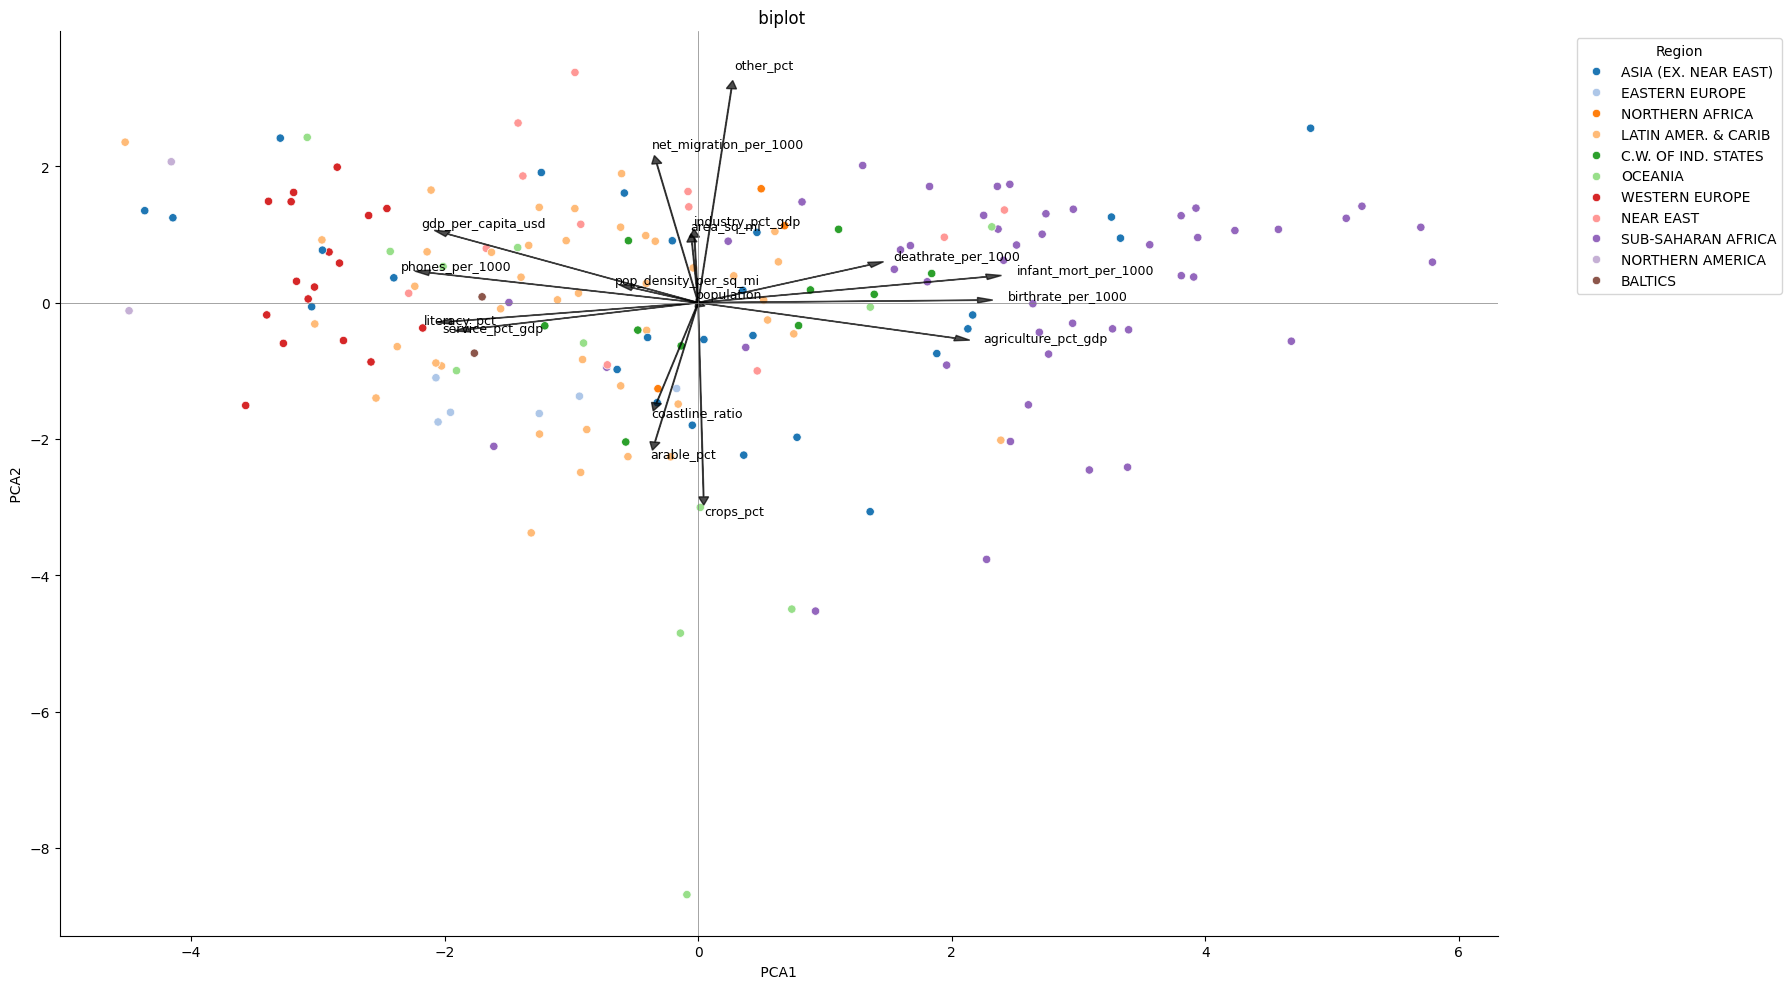

In [197]:

plt.figure(figsize=(18, 10))

sns.scatterplot(data=pca_df,x="PCA1",y="PCA2",hue="region",palette="tab20")

plt.xlabel(" PCA1 ")
plt.ylabel(" PCA2 ")
plt.title(" biplot")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
sns.despine()

loadings = pca.components_.T[:, :2]   

for i, feature in enumerate(num_cols):
    plt.arrow(0, 0,loadings[i, 0] * 6,loadings[i, 1] * 6,color="black",alpha=0.7,width=0.005,head_width=0.08,length_includes_head=True)
    plt.text(loadings[i, 0] * 6 * 1.05,loadings[i, 1] * 6 * 1.05,feature,color="black",fontsize=9)

plt.axhline(0, color="grey", linewidth=0.5)
plt.axvline(0, color="grey", linewidth=0.5)
plt.grid(False)
plt.tight_layout()
plt.show()


### interpretacja 

- jak interpretowac biplot?

- Punkty znajdujące się w kierunku strzałki mają wyższe wartości danej zmiennej
- Punkty po przeciwnej stronie od origin mają niższe wartości tej zmiennej

- `Innymi słowy: wartości zmiennej rosną wzdłuż strzałki i maleją w przeciwną stronę.`


- Strzałki w PRAWO
  birthrate_per_1000, infant_mort_per_1000, deathrate_per_1000, agriculture_pct_gdp  
  Interpretacja: kraje o wysokiej dzietności, dużej śmiertelności i gospodarce opartej na rolnictwie.

- Strzałki w LEWO 
  gdp_per_capita_usd, phones_per_1000, literacy_pct, service_pct_gdp  
  Interpretacja: kraje bogate, rozwinięte, z wysokim poziomem edukacji i usług.

- Strzałki w GÓRĘ 
  net_migration_per_1000, industry_pct_gdp, other_pct  
  Interpretacja: kraje z dodatnią migracją i silnym sektorem przemysłowym/pozarolniczym.

- Strzałki w DÓŁ  
  arable_pct, crops_pct, coastline_ratio  
  Interpretacja: kraje wyspiarskie lub z silnym udzialem rolnictwa w GDP, i tez duza iloscia powierzchni rolnizcej do uzycia.



## PCA W 3D 

- dodalismy do lepszej wizualizacji i zobrazowania kierunkow warinacji interaktywny 3D gdzie mozna zobaczyc jakie kraje sa outlierami posczegolne kraje w pokolorwanych skupiskach etc 

In [198]:
import plotly.graph_objects as go
import numpy as np

pca3_df = pca_df[["PCA1", "PCA2", "PCA3", "region", "country"]].copy()

regions = pca3_df["region"].astype("category")

fig = go.Figure()

fig.add_trace(
    go.Scatter3d(
        x=pca3_df["PCA1"],
        y=pca3_df["PCA2"],
        z=pca3_df["PCA3"],
        mode="markers",
        marker=dict(size=5,color=regions.cat.codes,colorscale="Viridis",opacity=0.9),
        text=pca3_df["country"],   
        hovertemplate="<b>%{text}</b><br>PCA1=%{x}<br>PCA2=%{y}<br>PCA3=%{z}<extra></extra>"
    )
)

for i, feature in enumerate(num_cols):
    fig.add_trace(
        go.Scatter3d(
            x=[0, pca.components_.T[:, :3][i,0] * 4],
            y=[0, pca.components_.T[:, :3][i,1] * 4],
            z=[0, pca.components_.T[:, :3][i,2] * 4],
            mode="lines+text",
            text=[None, feature],
            textposition="top center",
            line=dict(color="black", width=4)
        )
    )

fig.update_layout(
    scene=dict(
        xaxis_title="PCA1",
        yaxis_title="PCA2",
        zaxis_title="PCA3"
    ),
    width=1300,
    height=1200
)

fig.show()


# T-SNE 


- https://www.cs.toronto.edu/~fritz/absps/sne.pdf --> First version SNE 
- https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf --> T-SNE

## Opis algorytmu 

t-SNE (t-distributed Stochastic Neighbor Embedding) to algorytm redukcji wymiarów,
który ma na celu zachowac jaknajwiecej lokalnej struktury danych wysokowymiarowych podczas
rysowania mapowania w 2/3D

## Jak działa?

### 1. Zamiana odległości na prawdopodobieństwa w wysokim wymiarze
Dla każdego punktu oblicza się, jak bardzo inne punkty są do niego podobne,
stosując rozkład Gaussa. Szerokosc "dzwonu" Gaussa (sigma) dobierana jest oddzielnie
dla każdego punktu tak, aby entropia odpowiadała zadanej
wartości *perplexity* (np. 30) czyli liczbie sąsiadów.

Powstaje macierz podobieństw $P_{ij}$.

### 2. Szukanie układu w niskim wymiarze
W 2D/3D definiuje się podobną macierz $Q_{ij}$, używając rozkładu Cauchy’ego
(t-rozklad), który ułatwia separację klastrów („crowding problem”).

### 3. Minimalizacja różnicy $P$ vs $Q$
Algorytm minimalizuje KL-Divergence (Intuicyjnie roznice miedzy rozkladem benchmark, i tym z niskiego wymiaru chcemy zeby roznice byly jak najmniejsze):

$$
KL(P\|Q) = \sum_{i \ne j} P_{ij} \log \frac{P_{ij}}{Q_{ij}}
$$


- W praktyce juz sie go nie uzywa sa lepsze algorytmy np U-MAP paCMAP , ktora sa w stanie lepiej odwzorowac lokalne zaleznosci i zachowac duza czesc globalnych i sa bardziej stabilne

## plusy i minusy

- znajduje nieliniowe zaleznosci miedzy zmiennymi
- W implementacji Barnes–Hut działa w złożoności **O(n *log n)** (zamiast O(n²)).

- problematyczny parametr perplexity, czasami schodzi chwile zeby dobrac wlasciwa wartosc
- nie zachowuje globalnych zaleznosci przez to ze skaluje gaussian softmax n najblizych punktow 
- niestabilny za kazdym odpaleniem losuje punkty z rozkladu normal z srednia 0 i małą wariancja (jest wersja na initalize z PCA bardzije stabilna)
 


perplexity=5, KL=0.5978
perplexity=10, KL=0.6278
perplexity=20, KL=0.4888
perplexity=30, KL=0.4217
perplexity=40, KL=0.3463
perplexity=50, KL=0.2915
perplexity=70, KL=0.1982
perplexity=80, KL=0.1593
perplexity=90, KL=0.1111
perplexity=100, KL=0.1050
perplexity=110, KL=0.0717
perplexity=120, KL=0.0576


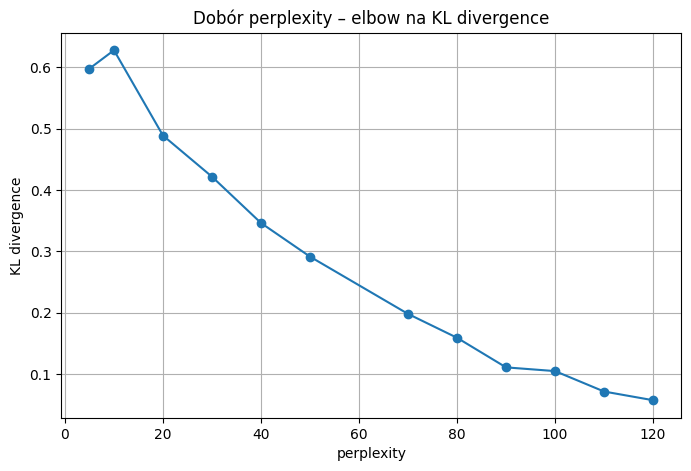

In [200]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

perplexities = [5, 10, 20, 30, 40, 50,70,80,90,100,110,120]
kl_values = []

for perp in perplexities:
    tsne = TSNE(
        n_components=2,
        perplexity=perp,
        learning_rate='auto',
        init="random",
        random_state=42
    )
    tsne_result = tsne.fit_transform(X_scaled)
    kl_values.append(tsne.kl_divergence_)
    print(f"perplexity={perp}, KL={tsne.kl_divergence_:.4f}")

plt.figure(figsize=(8,5))
plt.plot(perplexities, kl_values, marker="o")
plt.xlabel("perplexity")
plt.ylabel("KL divergence")
plt.title("Dobór perplexity – elbow na KL divergence")
plt.grid(True)
plt.show()


- wartosc paramu perplexity mozna dobrac wedlug elbow method jak w k-means (jest to raczje heurystyka), dobor parametru perplexity w t-sne jest dosyc czasochlonny i doysc niewygodny jest to jeden z najwiekszych ( w mojej opinii najwiekszy minus T-sne), i dlatego obenie sa lepsze algorytmy do branchu unsupervised learningu tzn manifold-learningu np U-MAP albo PaCMAP  

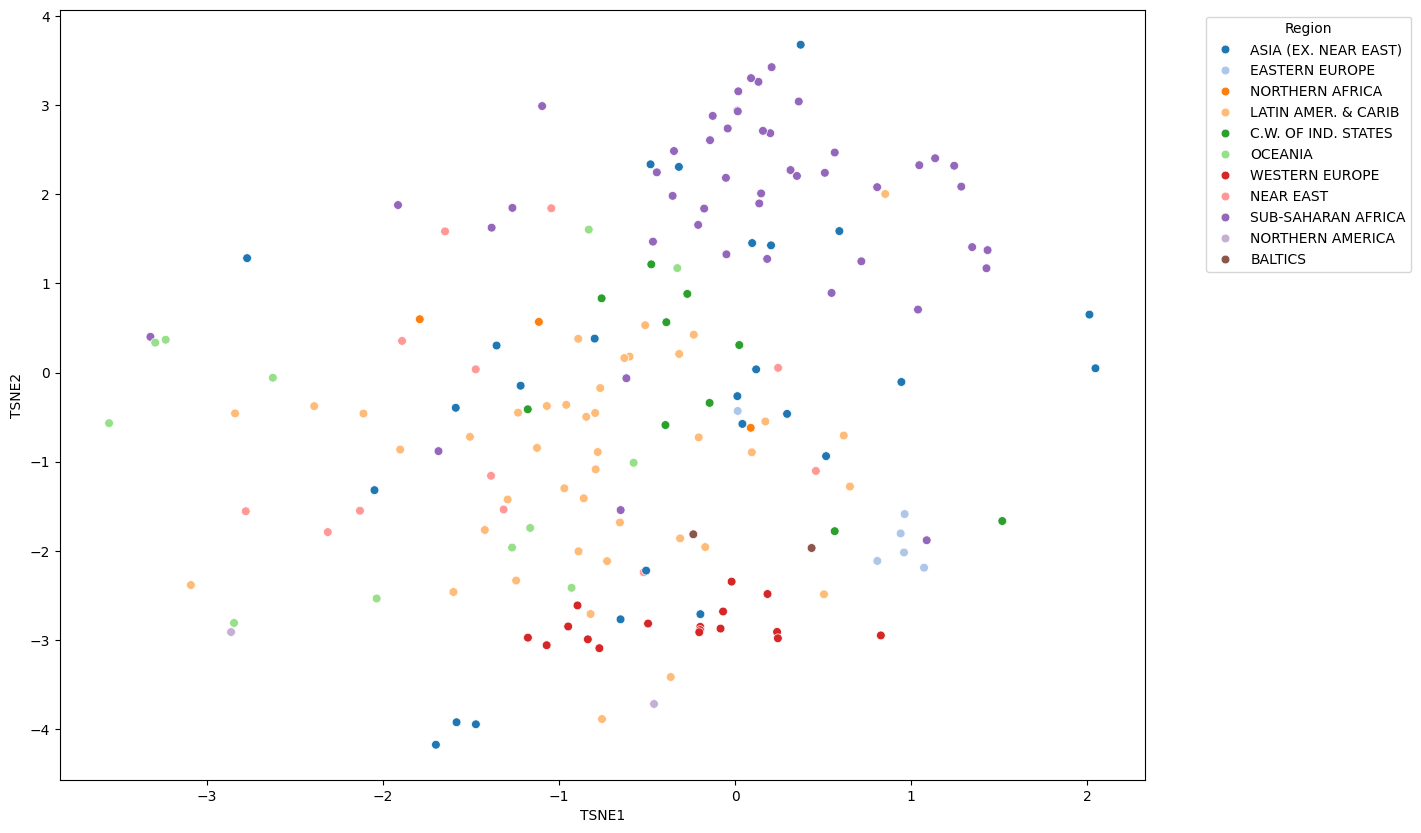

In [201]:
from sklearn.manifold import TSNE

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[data.select_dtypes(include=[np.number]).columns].values)

tsne = TSNE(n_components=2,perplexity=90,learning_rate='auto',init="pca",random_state=42)

tsne_result = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame({"TSNE1": tsne_result[:, 0],"TSNE2": tsne_result[:, 1],"country": data["country"],"region": data["region"]})

plt.figure(figsize=(14, 10))
sns.scatterplot(data=tsne_df,x="TSNE1",y="TSNE2",hue="region",palette="tab20",s=40)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [202]:
import plotly.express as px

fig = px.scatter(
    tsne_df,
    x="TSNE1",
    y="TSNE2",
    color="region",
    hover_name="country",
    color_discrete_sequence=px.colors.qualitative.Set3,
    width=1500,
    height=1200
)

fig.update_traces(marker=dict(size=12, opacity=0.9))

fig.update_layout(
    plot_bgcolor="white",
    paper_bgcolor="white",
    xaxis=dict(showgrid=True, gridcolor="#e0e0e0"),
    yaxis=dict(showgrid=True, gridcolor="#e0e0e0"),
    legend_title_text="Region"
)

fig.show()


## interpreracja wynikow algosa

- Brak jednakowych klastrow co jest raczej normalne biorac pod uwage to ze w kazdym regionie mozna znalezc panstwo ktore jest niestabilne np Pakistan w azji obok Kamerunu i Zambii ogolnie mowiac w panstwach afryki sub-saharyhskiej , Haiti z Latin america , lub afganistan z middle east lub tez Papua nowa gwinea, panstwa niestabilne o slabym poziomie zycia podobne do siebie T-SNE uchwycilo bardzo dobrze. Troche gorzej uchwycilo panstwa europy zachodniej , gdie kraje takie jak Niemcy ,Francja UK ,Japonia ,Austria ssa obok siebie. I poraz kolejny klaster pokazuje ze panstwa taki jak izrael , Singapore Hong-kong i Macau (specjalny chinski region administracyjny). Dodatkowo lokalne struktury sa ok pokazane np zoltym kolorem Rumunia Polska Czechy etc jako Eastern european countries, Latin america rowniez , jednak sporo klastrow nachodzi na siebie. Duzo krajow jest rowniez wyspiarskich szczegolnie (zaznaczone w latin america czerwonym kolorem) sa one blisko krajow z panstw Europy zachodniej, na turystycznych wyspach takich jak bahamy czy barbados moze zyc duzo bogatych ludzi milionerow-miliarderow ktorzy moga podbijac statystyki np ilosc telefonow na 1000 ludzi literacy rate, gdp_per_capita etc.

Ogolny wniosek jest taki ze duzo krajow na siebie nachodzi bo w kazdej grupie krajow instieja takie ktora sa bardziej stabilne i blizej panstw europy zachodniej i takie ktora sa niestabilnei sa blizej panstw afyrki sub-saharyjskej. Plusem tez jest to ze brak jest panstw np USA obok krajow afryki subsaharyjskiej, wskazuje to an to ze algorytm nie ma dziwnej losowosci/niestabilnosci w rozmieszczeniu krajow,

# U-MAP

https://arxiv.org/pdf/1802.03426

UMAP (Uniform Manifold Approximation and Projection)

## Jak działa?

### 1. Budowa grafu sąsiedztwa w wysokim wymiarze
Dla każdego punktu znajdujemy `n_neighbors` najbliższych punktów.
Na tej podstawie UMAP tworzy rozmyty graf sąsiedztwa czyli macierz wag:

- im bliżej dwa punkty → większa waga $P_{ij}$,
- im dalej → waga szybko spada do zera.

To jest odpowiednik macierzy $P_{ij}$ z t-SNE, ale liczony inaczej (nie przez Gaussa, tylko przez lokalną skalę odległości).

### 2. Konstrukcja grafu w niskim wymiarze
W przestrzeni 2D/3D tworzymy analogiczny graf o wagach $Q_{ij}$.
Wagi opisują, jak bardzo punkty powinny być połączone w mapowaniu.

### 3. Minimalizacja różnicy $P$ i $Q$
UMAP minimalizuje loss function podobną do cross-entropy, która:

- **mocno karze**, jeśli dwa punkty były blisko w oryginale ($P_{ij}$ duże), a są daleko w 2D ($Q_{ij}$ małe),
- **słabiej karze**, jeśli dwa punkty miały niskie $P_{ij}$, ale są blisko w 2D.

### wzory 

Formalnie UMAP minimalizuje loss function uzywajac SGD miedzy 2 grafami intuicja: (chodzi o to zeby to low representation w 2/3d bylo jaknajblizej high representation)

$$
\mathcal{L} =
\sum_{i<j}
\left[
P_{ij}^{(sym)} \, \log(Q_{ij})
\;+\;
\left(1 - P_{ij}^{(sym)}\right)
\log\left(1 - Q_{ij}\right)
\right]
$$

gdzie macierz podobieństw w wysokim wymiarze definiujemy jako:

$$
P_{ij} = \exp\left( -\frac{d(i,j) - \rho_i}{\sigma_i} \right)
$$

a symetryzację wykonujemy według:

$$
P_{ij}^{(sym)} = P_{ij} + P_{ji} - P_{ij} P_{ji}
$$

natomiast podobieństwa w niskim wymiarze liczone są jako:

$$
Q_{ij} = \left( 1 + a \, \|y_i - y_j\|^{2b} \right)^{-1}
$$

- gdzie parametry $a$ i $b$ dopasowuje się tak, aby odpowiadaly wartosci paramu *min\_dist*.
- min_dist reguluje, jak blisko punkty mogą znajdować się od siebie w 2D im mniejsza wartość, tym bardziej zbite klastry im większa, tym większy minimalny odstęp między punktami.
 

## plusy 

- złożoność `~O(n log n)`
- Bardziej stabilny niż t-SNE powtarzalność wyników jest dużo większa (chociaz tez wystepuje chociazby uzycie do optymalizacji loss function SGD).
- Zachowuje więcej globalnych zależności między klastrami.
- Parametr `n_neighbors` kontroluje balans: (traktowany jako hyperparam do dobrania w wizualiacji, )
  - małe wartości → bardzo lokalna struktura (jak t-SNE),
  - duże wartości → bardziej globalna struktura.
- W praktyce szybszy niz T-SNE

- w praktyce UMAP jest obecnie najczesiciej uzywanym algosem do dimension reduction. 

## minusy

- zmiana wynikow po kazdym odpaleniu na nowo algosu (znacznie mniejsza wariancje tego w porownaniu do T-SNE)
- wybór parametrów `n_neighbors`, `min_dist` potrafi mocno zmieniać wynik,so czasem trzeba je dostrajać eksperymentalnie,



In [203]:
import umap

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[data.select_dtypes(include=[np.number]).columns].values)

umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1,n_components=2,metric="euclidean",random_state=42)

umap_result = umap_model.fit_transform(X_scaled)

umap_df = pd.DataFrame({"UMAP1": umap_result[:, 0],"UMAP2": umap_result[:, 1],"country": data["country"],"region": data["region"]})


In [204]:
import plotly.express as px


fig = px.scatter(umap_df,x="UMAP1",y="UMAP2",color="region",hover_name="country",color_discrete_sequence=px.colors.qualitative.Set3,width=1500,height=1200)

fig.update_traces(marker=dict(size=12, opacity=0.9))

fig.update_layout(plot_bgcolor="white",paper_bgcolor="white",xaxis=dict(showgrid=True, gridcolor="#e0e0e0"),yaxis=dict(showgrid=True, gridcolor="#e0e0e0"),legend_title_text="Region")

fig.show()


In [205]:
data[data['country']=='China']

,country,region,population,area_sq_mi,pop_density_per_sq_mi,coastline_ratio,net_migration_per_1000,infant_mort_per_1000,gdp_per_capita_usd,literacy_pct,phones_per_1000,arable_pct,crops_pct,other_pct,birthrate_per_1000,deathrate_per_1000,agriculture_pct_gdp,industry_pct_gdp,service_pct_gdp
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,0.15,-0.4,24.18,5000.0,90.9,266.7,15.4,1.25,83.35,13.25,6.97,0.125,0.473,0.403


In [206]:
data[data['country']=='United States']

,country,region,population,area_sq_mi,pop_density_per_sq_mi,coastline_ratio,net_migration_per_1000,infant_mort_per_1000,gdp_per_capita_usd,literacy_pct,phones_per_1000,arable_pct,crops_pct,other_pct,birthrate_per_1000,deathrate_per_1000,agriculture_pct_gdp,industry_pct_gdp,service_pct_gdp
214,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.5,37800.0,97.0,898.0,19.13,0.22,80.65,14.14,8.26,0.01,0.204,0.787


In [207]:
data[data['country'].isin(['Qatar','Kuwait','United Arab Emirates'])]

,country,region,population,area_sq_mi,pop_density_per_sq_mi,coastline_ratio,net_migration_per_1000,infant_mort_per_1000,gdp_per_capita_usd,literacy_pct,phones_per_1000,arable_pct,crops_pct,other_pct,birthrate_per_1000,deathrate_per_1000,agriculture_pct_gdp,industry_pct_gdp,service_pct_gdp
111,Kuwait,NEAR EAST,2418393,17820,135.7,2.80,14.18,9.95,19000.0,83.5,211.0,0.73,0.11,99.16,21.94,2.41,0.004,0.479,0.516
166,Qatar,NEAR EAST,885359,11437,77.4,4.92,16.29,18.61,21500.0,82.5,232.0,1.64,0.27,98.09,15.56,4.72,0.002,0.801,0.197
212,United Arab Emirates,NEAR EAST,2602713,82880,31.4,1.59,1.03,14.51,23200.0,77.9,475.3,0.60,2.25,97.15,18.96,4.40,0.040,0.585,0.375


## interpreracja wynikow algosa 


- W porownaniu do PCA T-SNE i MDS dotalismy 3 wyraznie rozdzielone ze soba klastry ktore podzieliy kraje na grupy (najgorsze wedlug quality of life sa samym dole) z wysokim infant mortality,agriculture_pct_gdp niskim phones_per_1000 literacy_pct gdp_per_capita_usd etc dodatkowo na samym dole kilka krajow z innych regionow np Haiti ,afganistan liberia ,oceania (papua nowa gwinea) etc . Pojawily sie Indie czyli 5 gospodarka na swiecie z wiadomych przyczyn niskie np literacy malo phones_per_1000 ale na wykresei jest bardziej jako outlier pokazane czyli niepasujace pod wiekszoscia przypadkow do krajow z afryki sub-saharyhskiej. 

- Klaster srodkowy To sa juz kraje pod wzgledem quality of life o wiele lepsze najwiecej ich jest z latin america, bylych krajow zwiazku radzieckiego , kraje europy wschodniej (ktore zostaly bardzo dobrze ze soba zlepione (zolty kolor polska ,romania bulgaria etc)) , rowniez mozna zauwazyc kilka innych lokalnych klastrow np Qatar ,Kuwait, UAE ktore tworza logiczny klaster podobne panstwa nie rozniace sie drastycznie pod wzgledem np pkb_per_capita i literacy rate, death rate , udziale rolnictwa w gospodarce , i jeszcze kilka inncyh mozna znalezc np miedzy krajami wyspiarskimi (czerowny kolor najwyzej w 2 klastrze).

- Najwieksze zdziwienie moze wywolac  pozycja Chin ktora jest obok np Kolumbii, jednak niskie pkb_per_capita, phones per 1000 literacy rate na poziomie 91% gdzie w europie zachodniej jest to po 96-97% , udzial przemyslu ~48% udzial rolncitwa 12% daje rowniez w porownaniu do USA wystarczajce arguemnty ze to przypisanie nie jest losowe, jest po prostu spowodowane struktura chinskiej gospodarki. 

- Dodatkowo rowniez wewnatrz krajow srednio developed/ srednie quality of life jest widocznych 5 lokalnych klastrow  i outliery np Cuba.

- i klaster 1 czyli kraje o najlepszym quality of life wiekszosc to kraje zachodnie UK USA Francja etc i azjatyckie np Hong-Kong , singapur , korea poludniowa , Macau, Japonia. A takze kilka krajow wyspiarkisch np barbados , wyspy kajmana , wyspy dziewicze. Rowniez bardzo dobrze jest odwzorowany klater krajow skandynawskich i szwajcarii jako krajow , ktore oczywiscie biorac tylko metryki ktore posiadamy w danych uchodza za najlepsze pod wzgledem quality of life. I oczywisce Izrael jako oczywisty jedyny reprezentatnt middle east, jako panstwo ktore jest najlepiej rozwiniete gospodarczo i najbardziej stabilne polityczne co skutukuje quality of life na poziomie panstw zachodu.

Ogolne wnioseki :

> **od krajów o najniższym quality of life → przez kraje średnie → o najwyzszych quality of life/wysoko rozwiniętych**

> **Region geograficzny nie przesadza o pewnosci wysokiej pozcji w rankingu np izrael lub niektora panstwa w azji np chiny nie maja chociaz podobnego do japonii quality of life **



# PODSUMOWANIE 


### MDS (metric)
- Podobny do PCA, ale bardziej rozciągnięty.
- Słabe separacje regionow duzo krajow miedzy siebie, slabo infromative to jest w porownaniu do PCA I UMAP.
- dobrze wyizolowal outliery 

### MDS (non-metric)
- większość punktów skupiona w centrum.
- Dobrze wylapuje outliery
- ciezko cokolwiek wyczytac z wykresu jest kraje zlepione blisko siebie przez outliery 

### PCA
- Zachowuje dobra globalną strukturę ale slabo widac lokalna jeden wielki zlepiony klaster z bardzo malymi lokalnymi podzialami. 

### t-SNE
- Wiele małych, lokalnych klastrów lepiej pokazuje lokalne zalenzosci i roznice miedzy nimi. Nadal jest wszystko zlepione w jeden duzy klaster to najwiekszy minus nie pokazuje global roznic.

### UMAP
- Trzy rozne jasno podzielone klastry wedlug quality of life/development, dodatkowo robi 5 klastrow lokalych w quality of ktore daja wiecej info o tym jak wyglada struktura krajow (rozdrabnia je jeszcze bardziej)    
- Zachowuje zarówno lokalne zależności, jak i globalny shape

## Który algorytm jest najlepszy?

UMAP jednoznacznie jest najlpeszy ponieważ jako jedyny.
- wyraźnie segmentuje kraje (low–mid–high quality of life).
- zachowuje globalny układ, którego t-SNE nie potrafi zachowac.
- jest stabilniejszy (mniej variance przy nowym runie algosa) niż t-SNE.
- daje wyniki lepsze niż  PCA/MDS/T-SNE.


Ogolne wnioski do tezy :

> **od krajów o najniższym quality of life przez kraje średnie o najwyzszych quality of life/wysoko rozwiniętych**

> **Region geograficzny nie przesadza o pewnosci wysokiej pozcji w rankingu np izrael lub niektora panstwa w azji np chiny nie maja chociaz podobnego do japonii quality of life**

> **generalnie wszystkie algosy zlapaly dobrze ogolny obraz krajow subsaharyjskich czyli dobrze je razem polaczyly podobnie to jest z krajami europy wschodniej**

> **roznice wynikaja w lokalnych klastrach gdzie UMAP zdecdywaonie radzi sobie najlepiej najgorzej MDS**
